In [1]:
import numpy as np
import seaborn as sns
import plotly.express as px
from scipy import stats
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

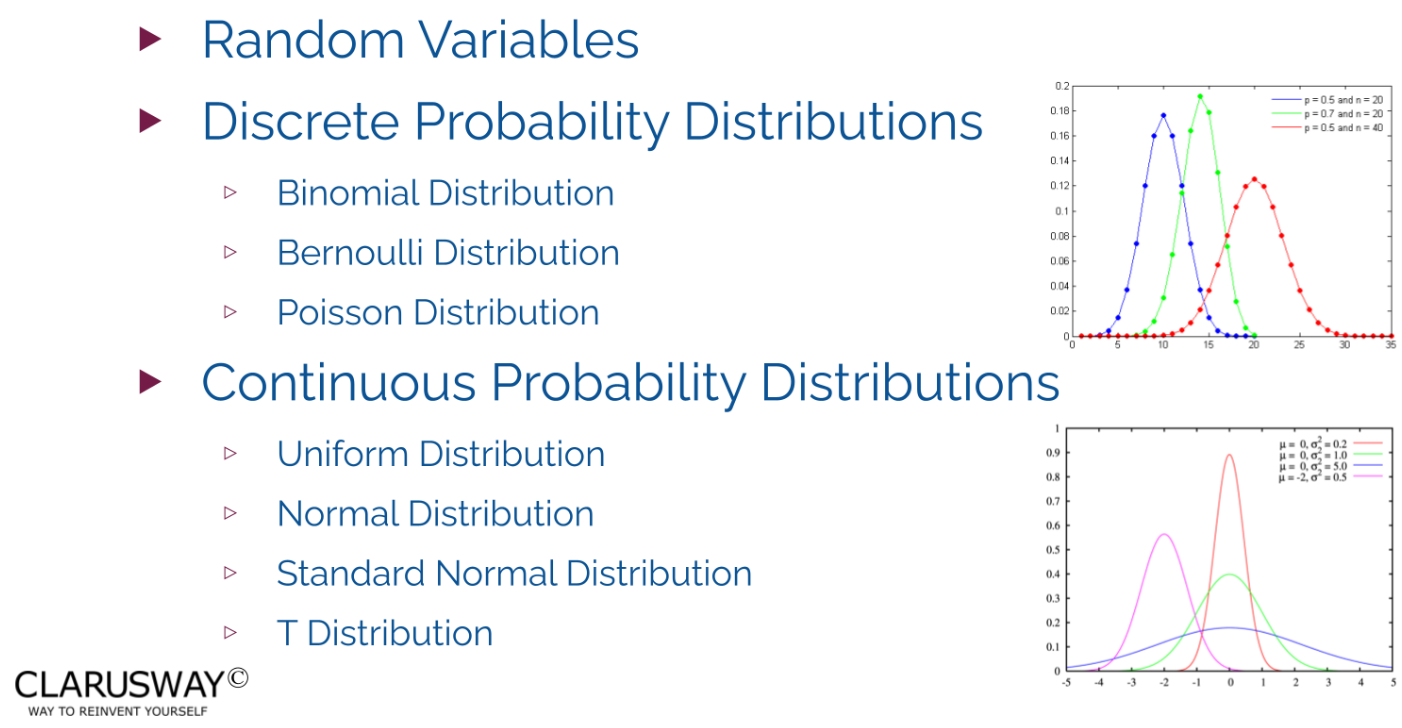

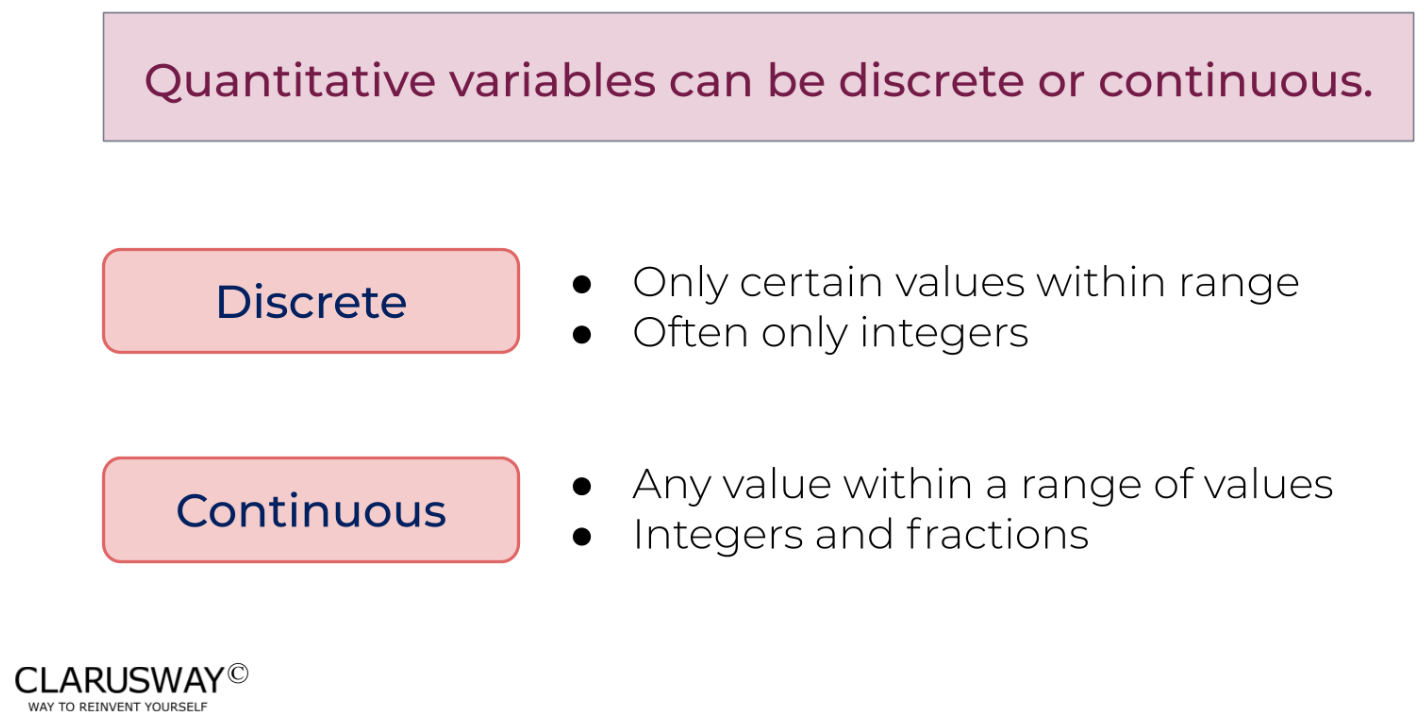

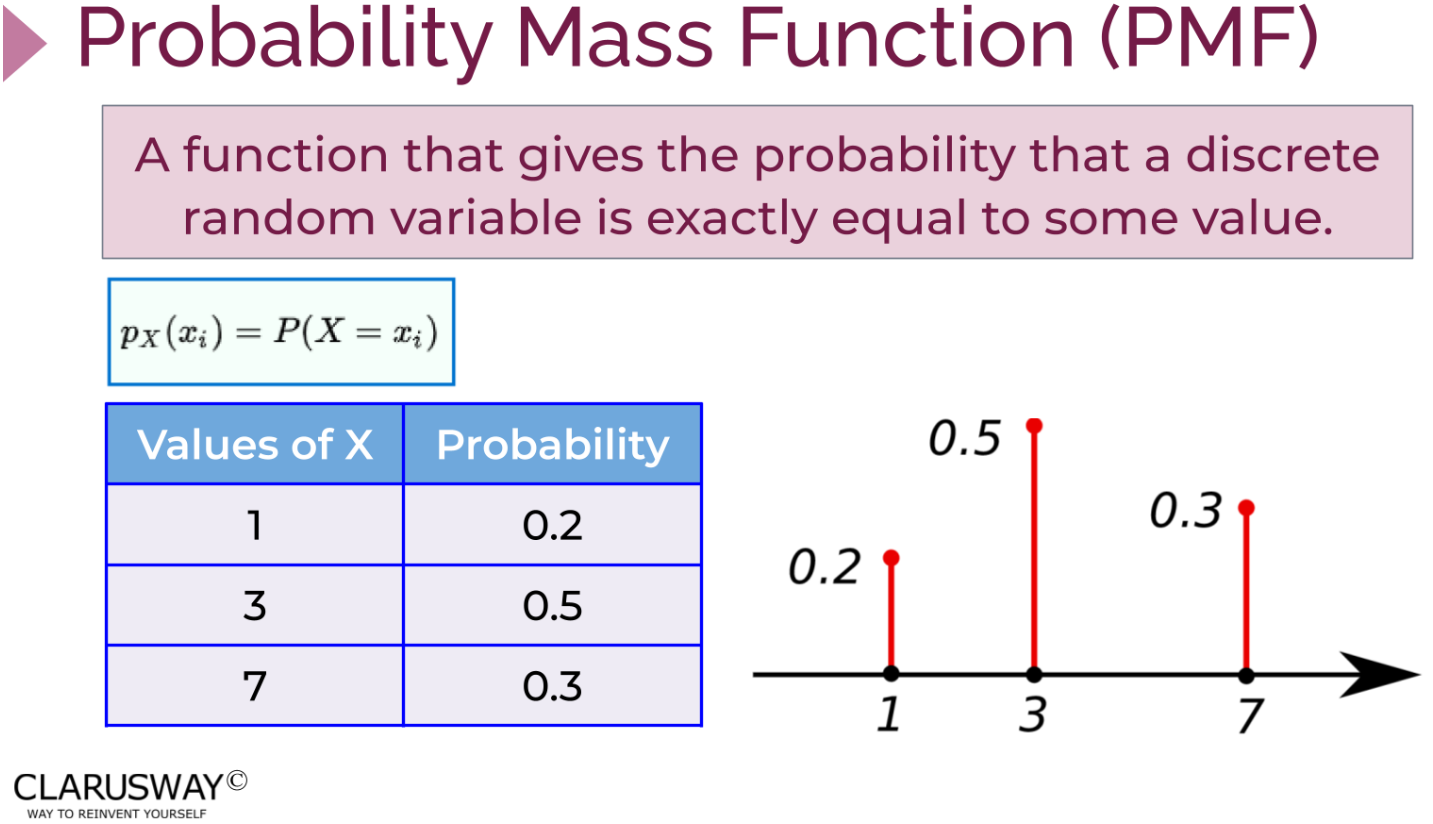

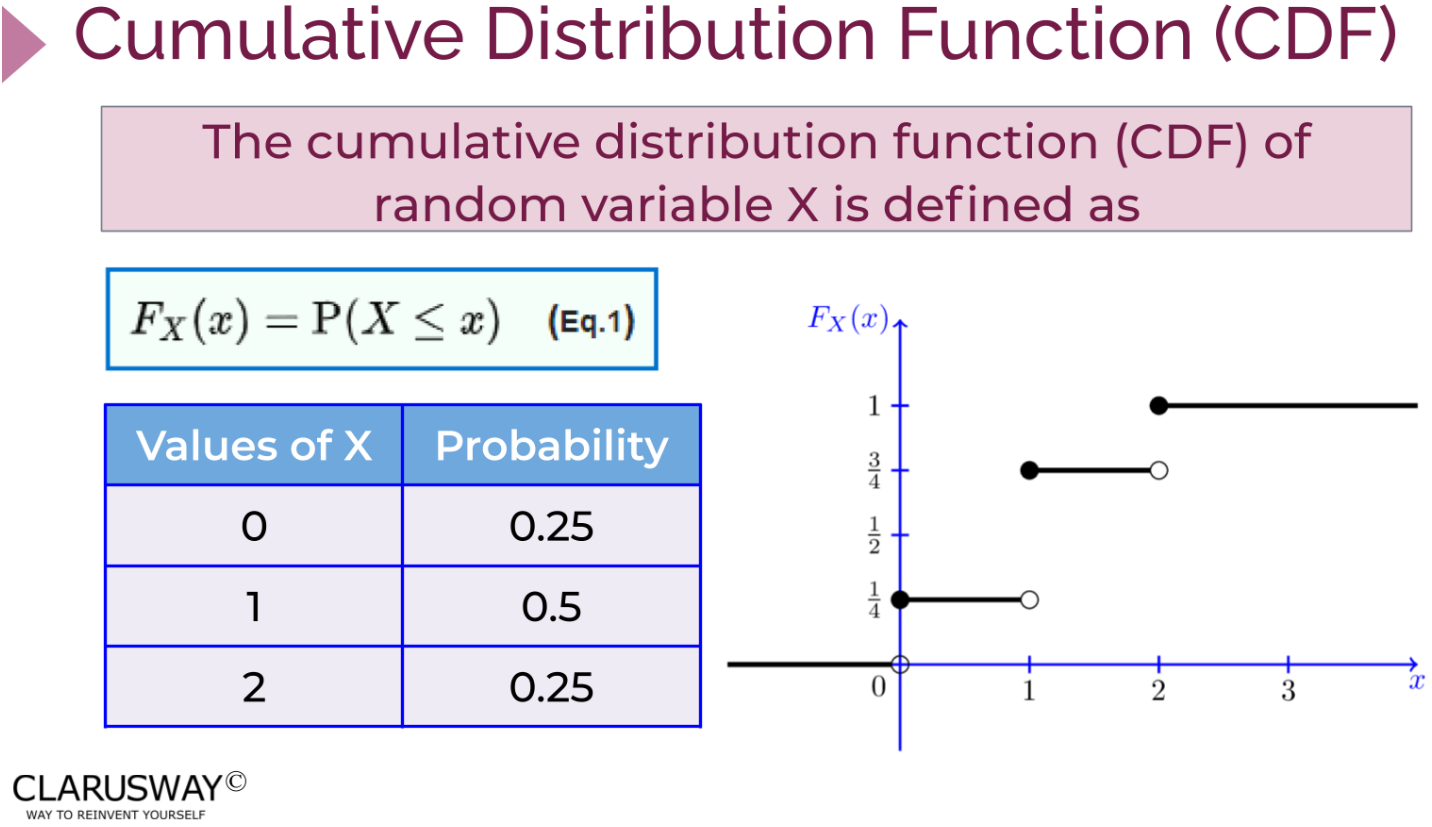

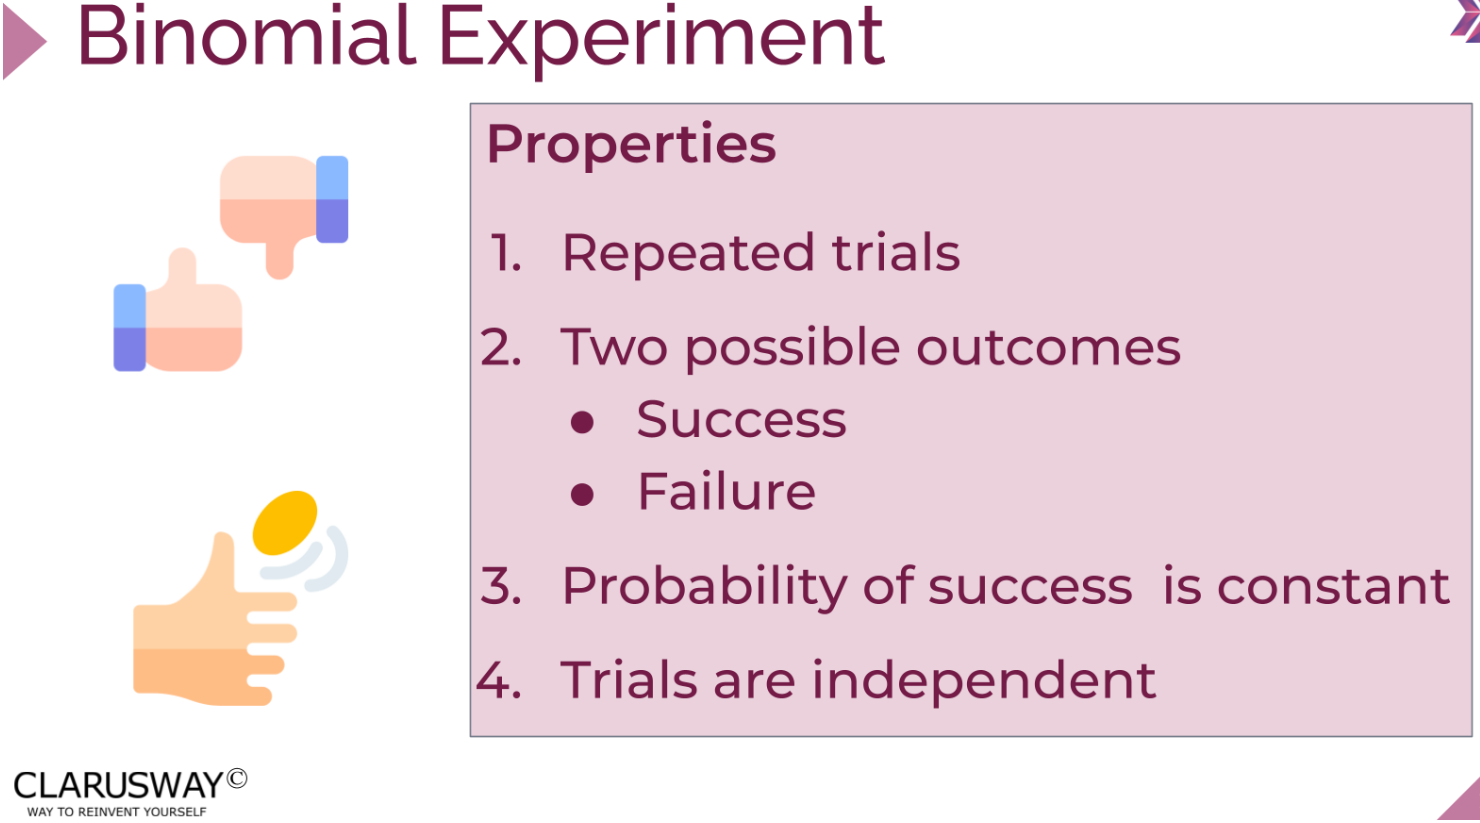

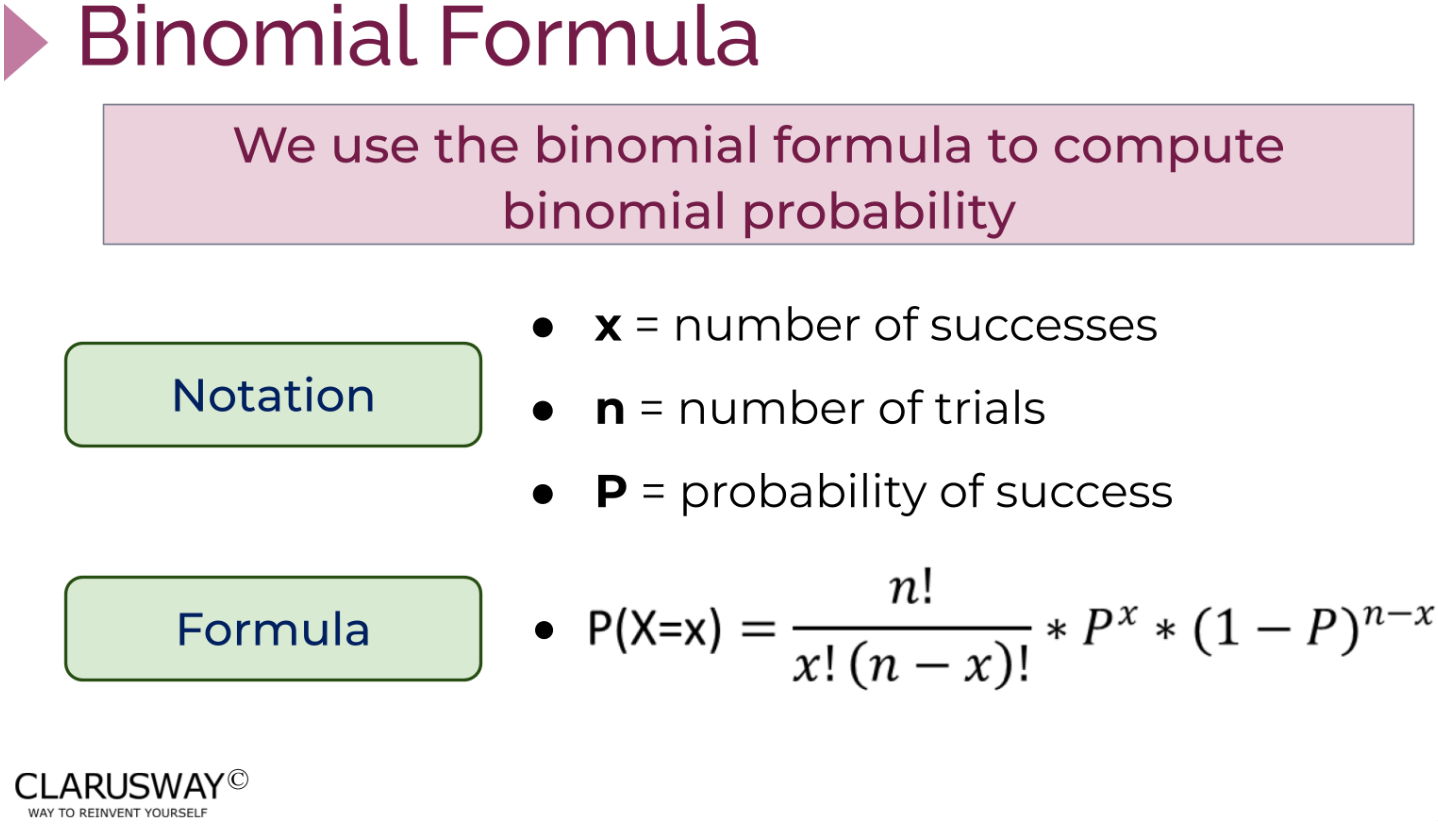

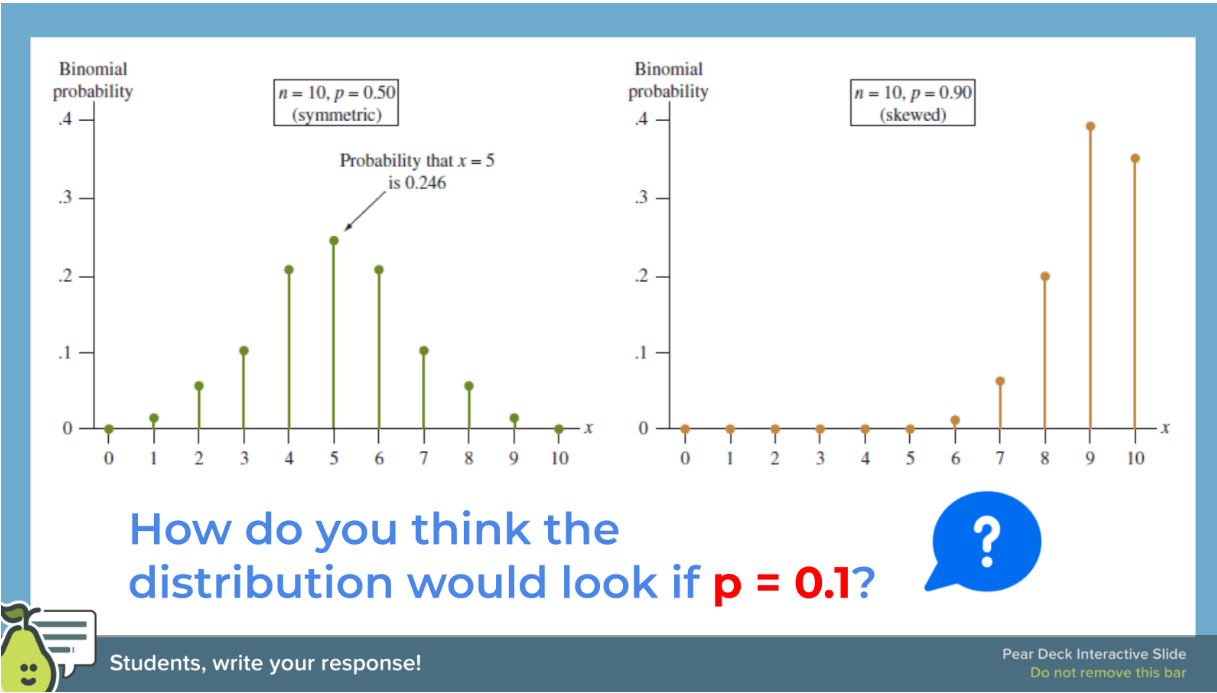

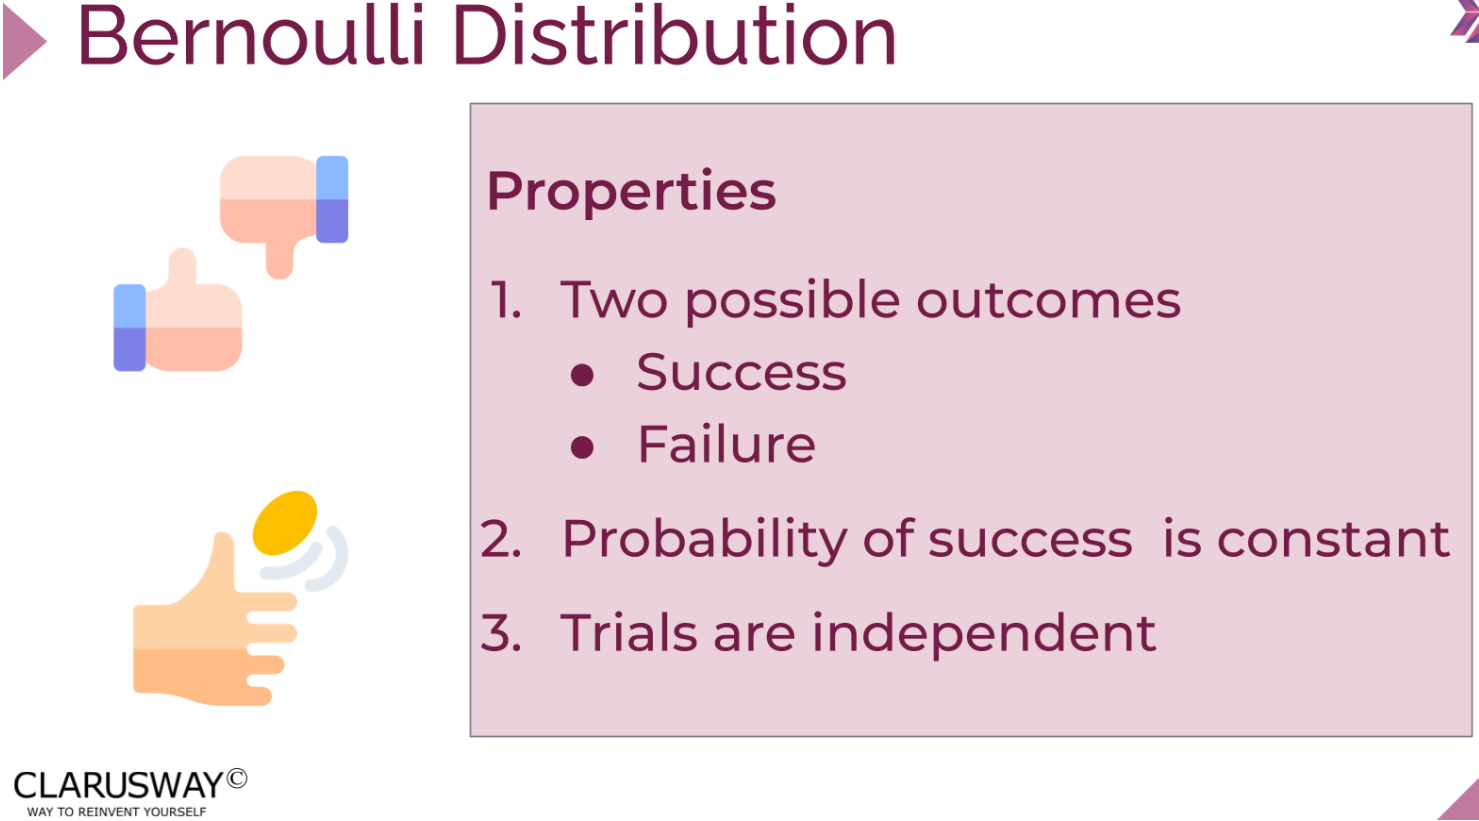

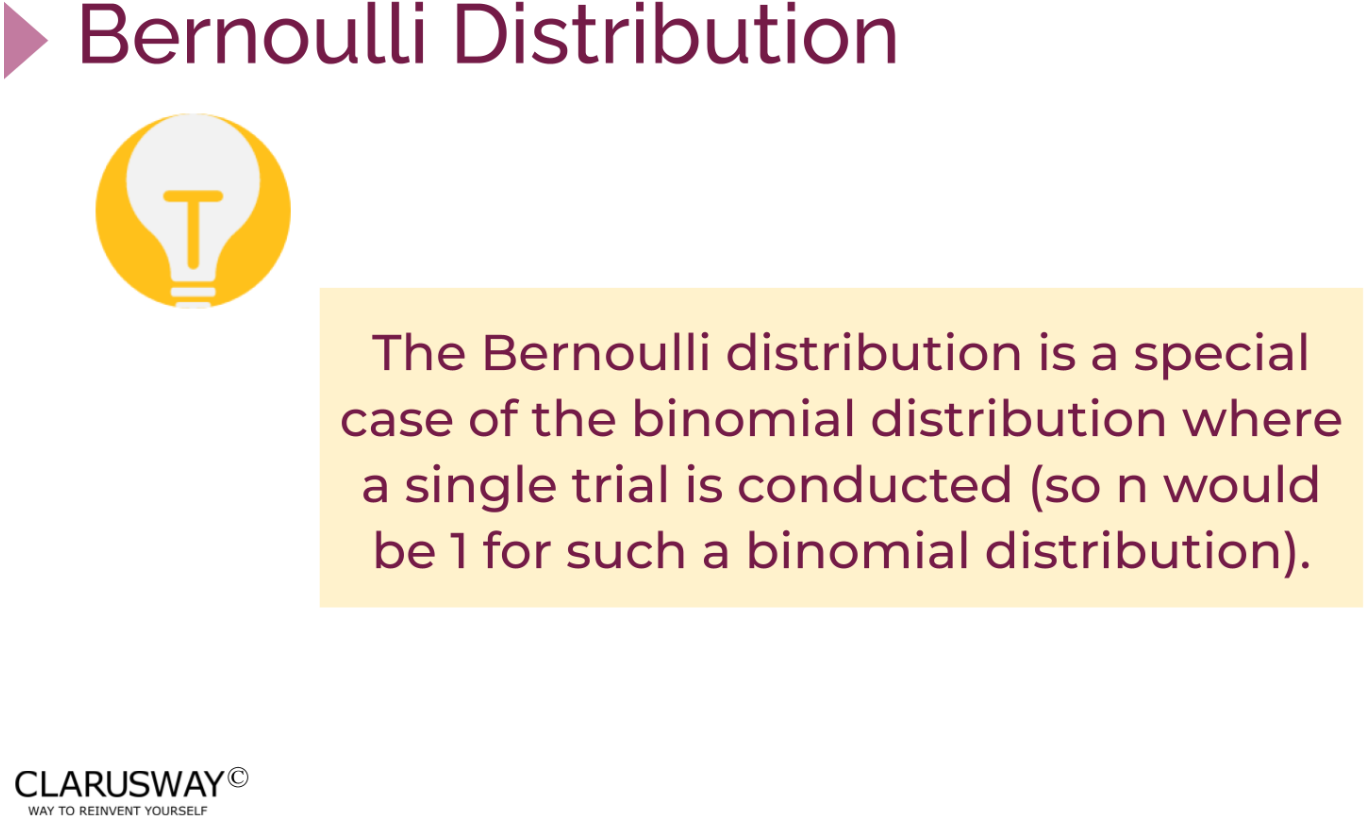

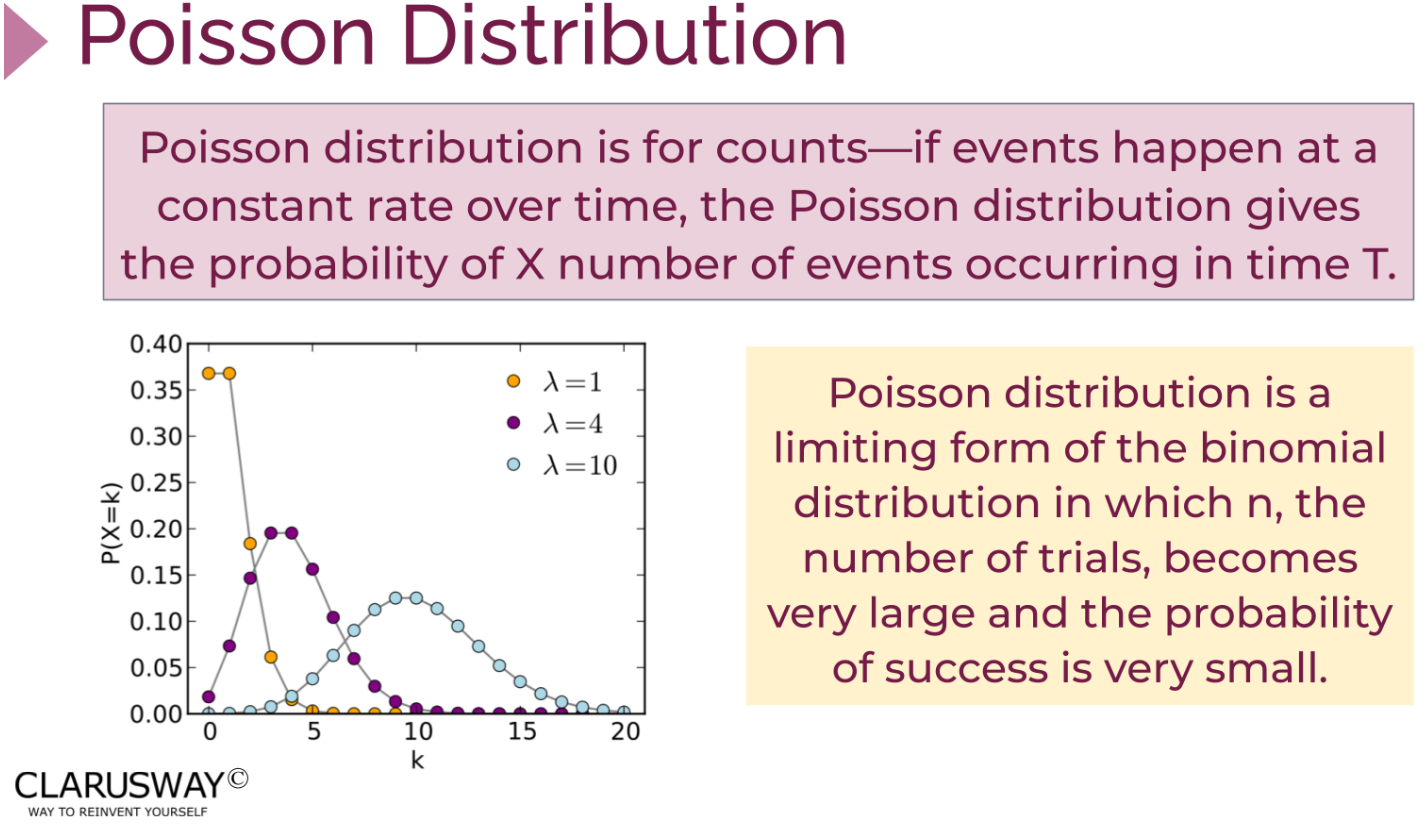

## Question 1
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

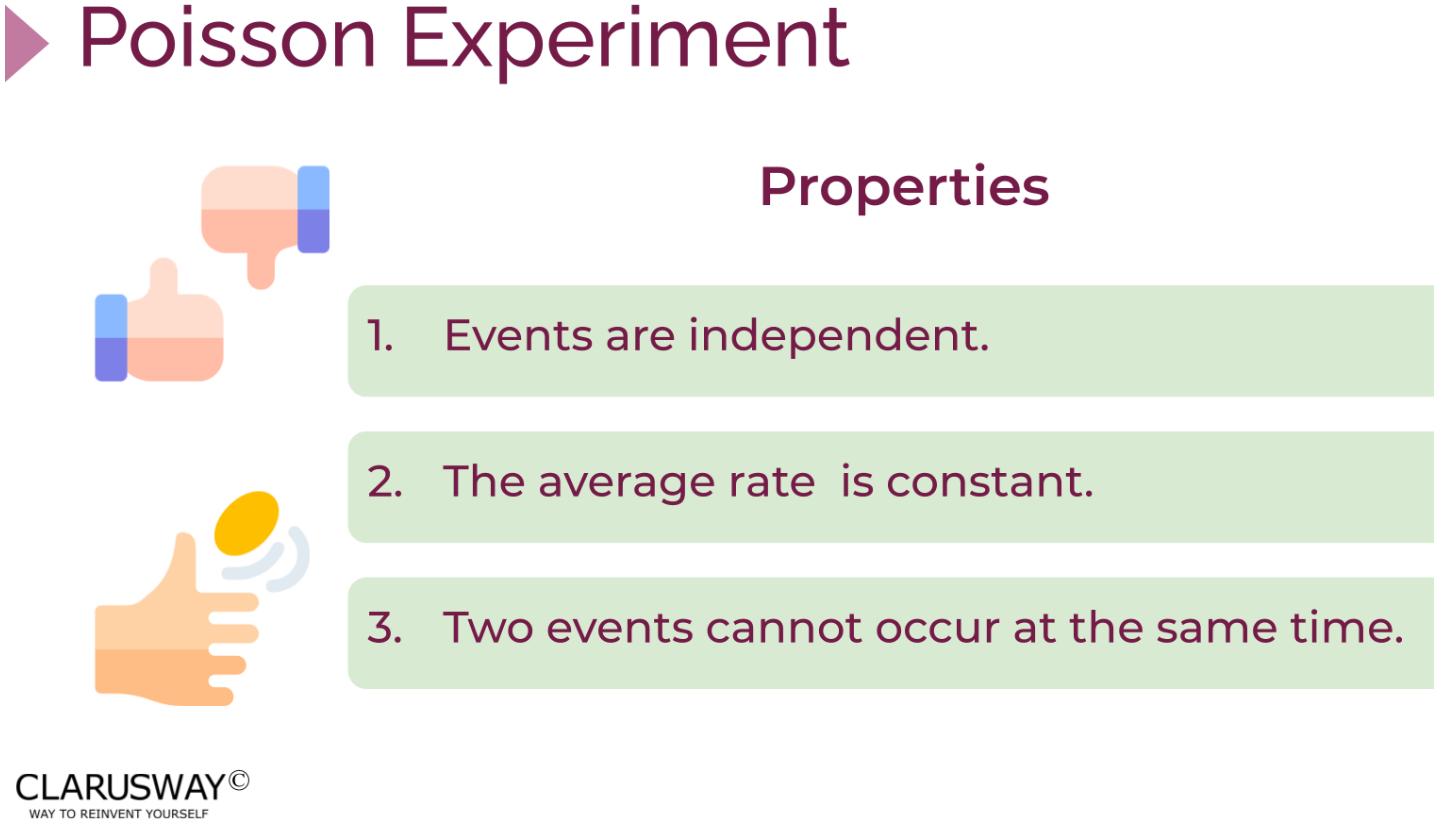

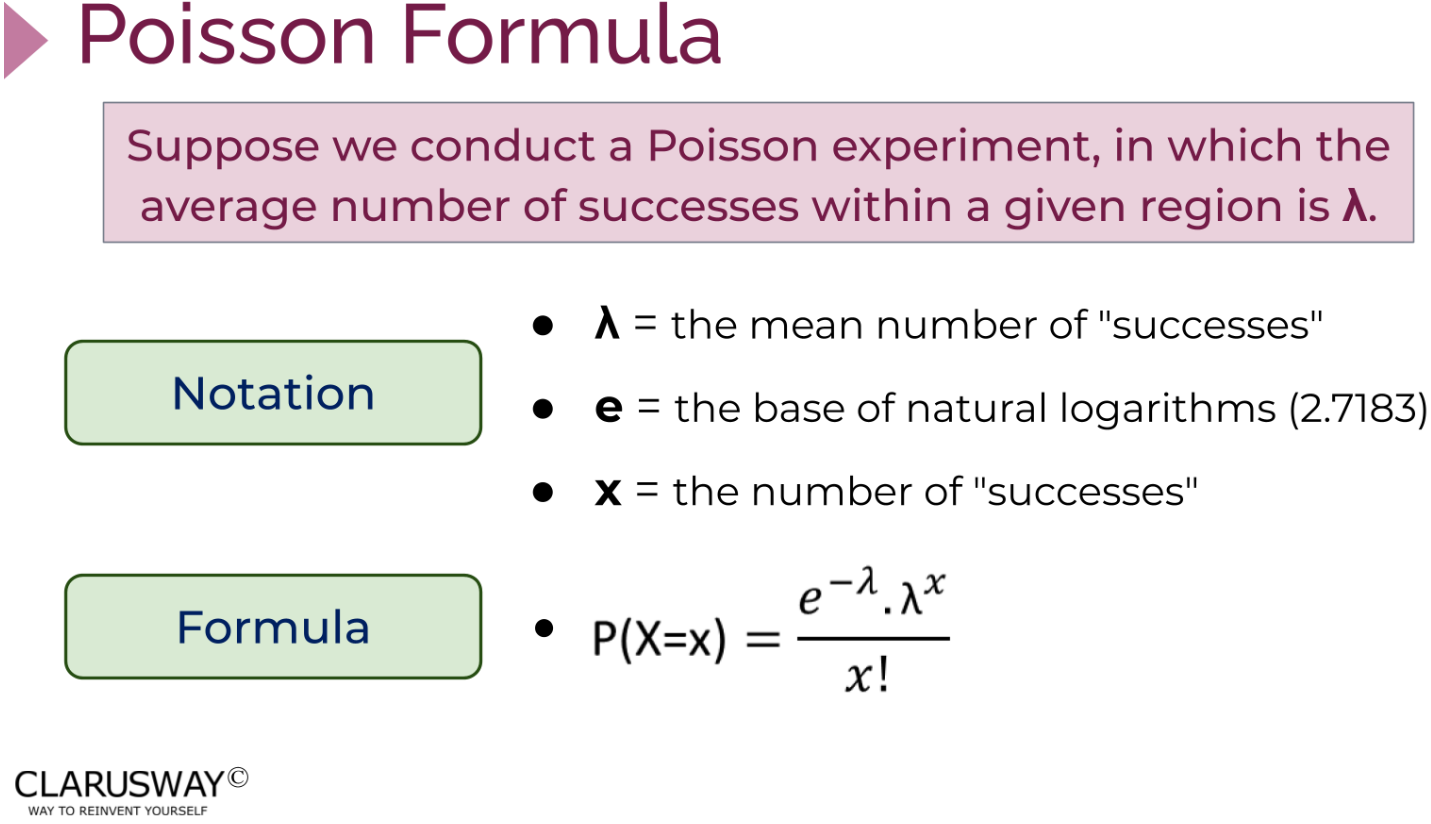

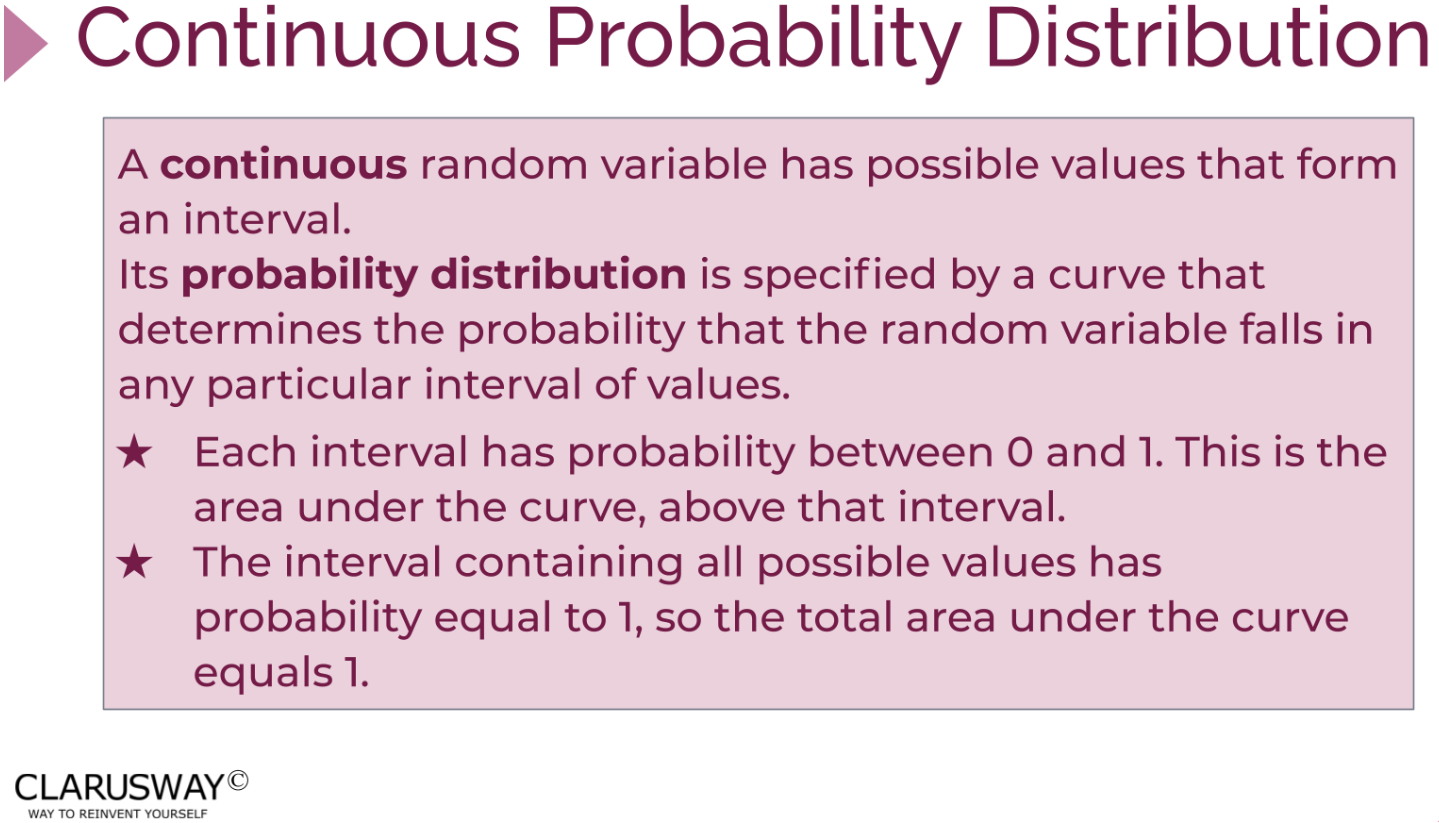

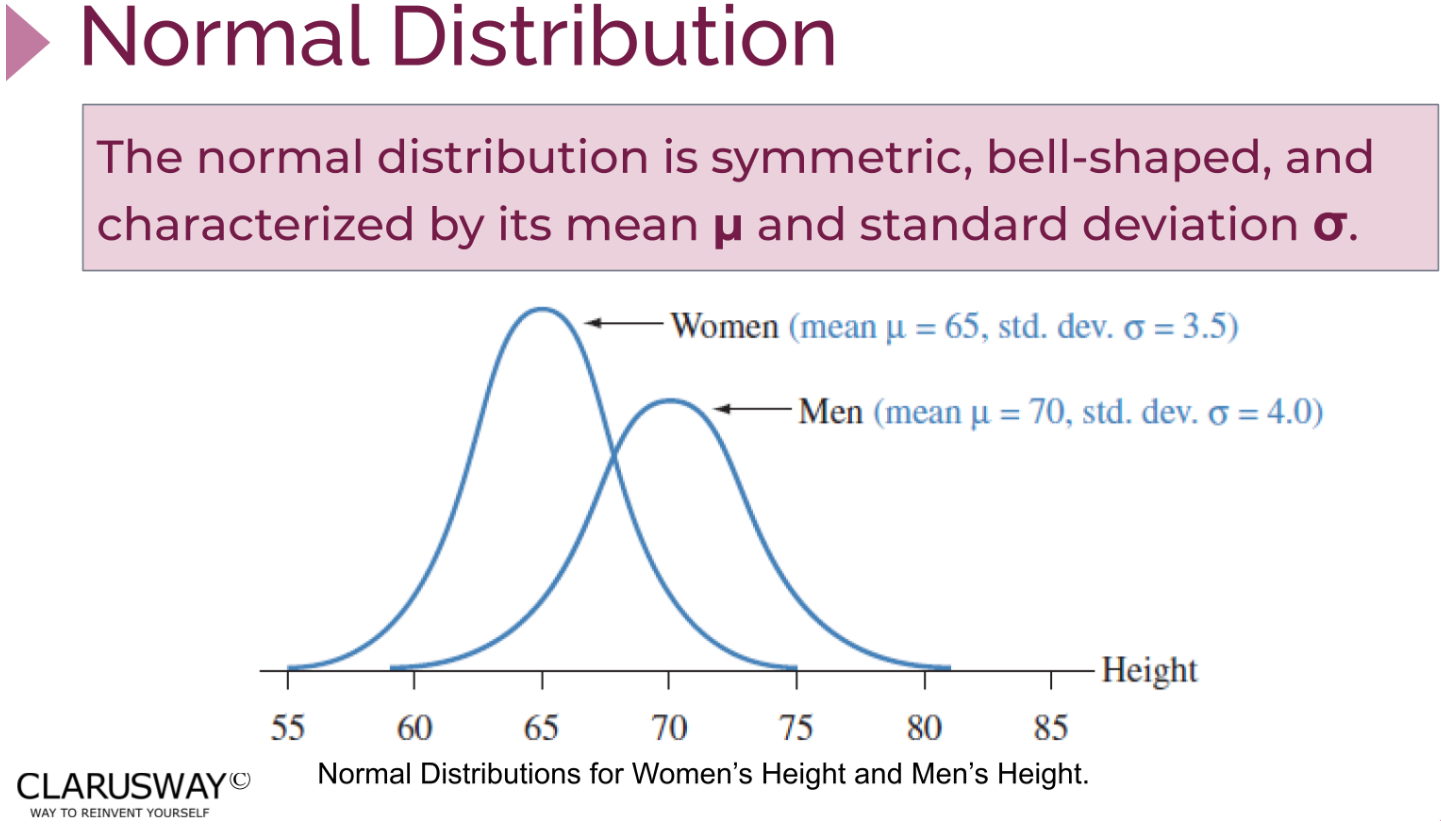

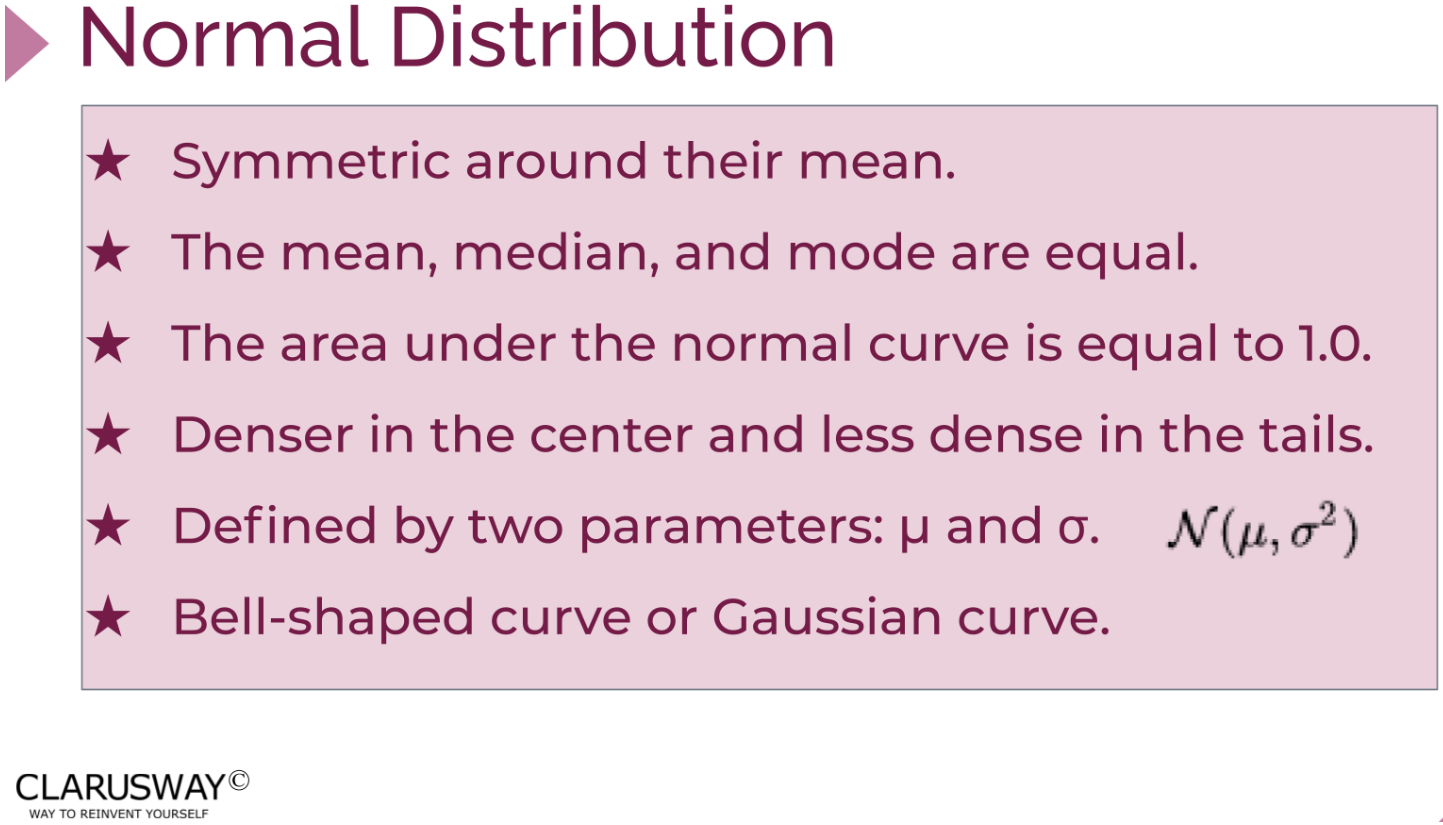

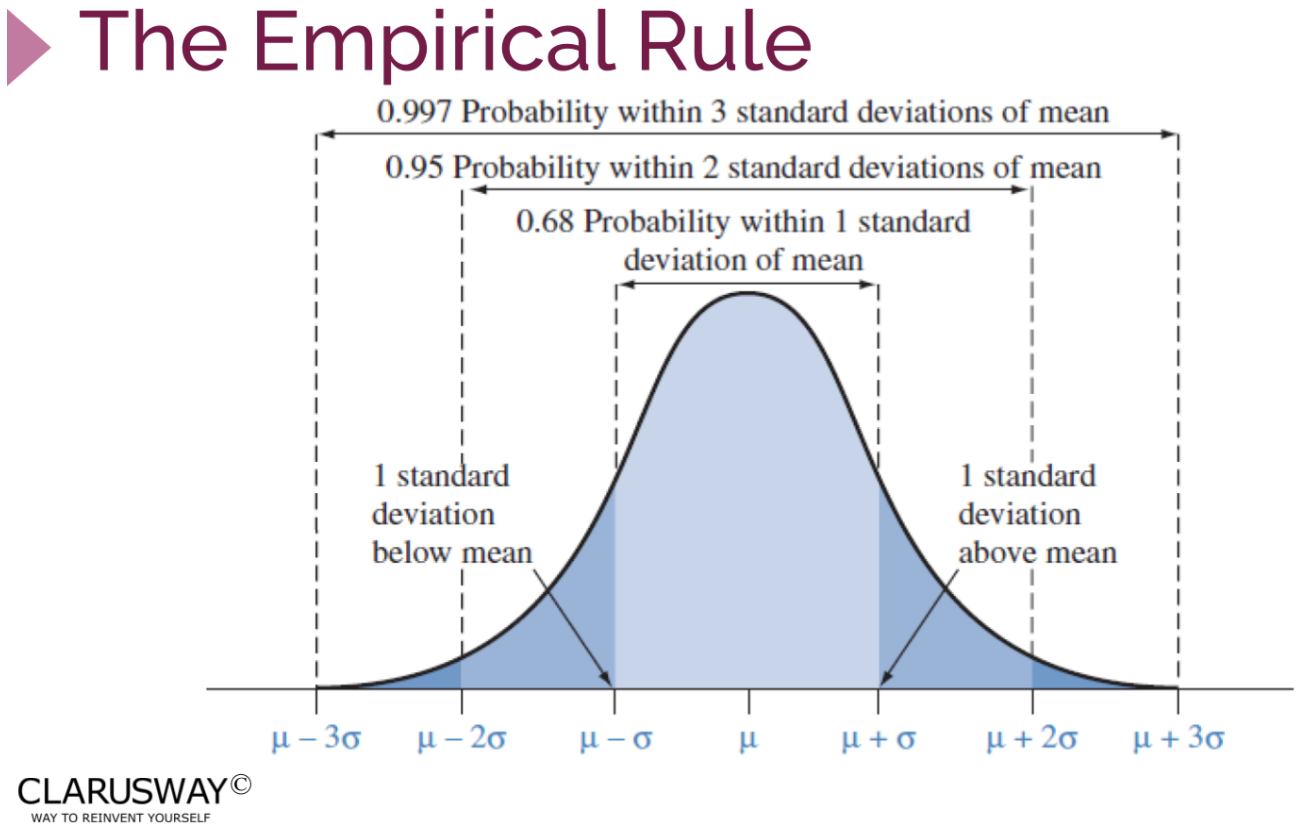

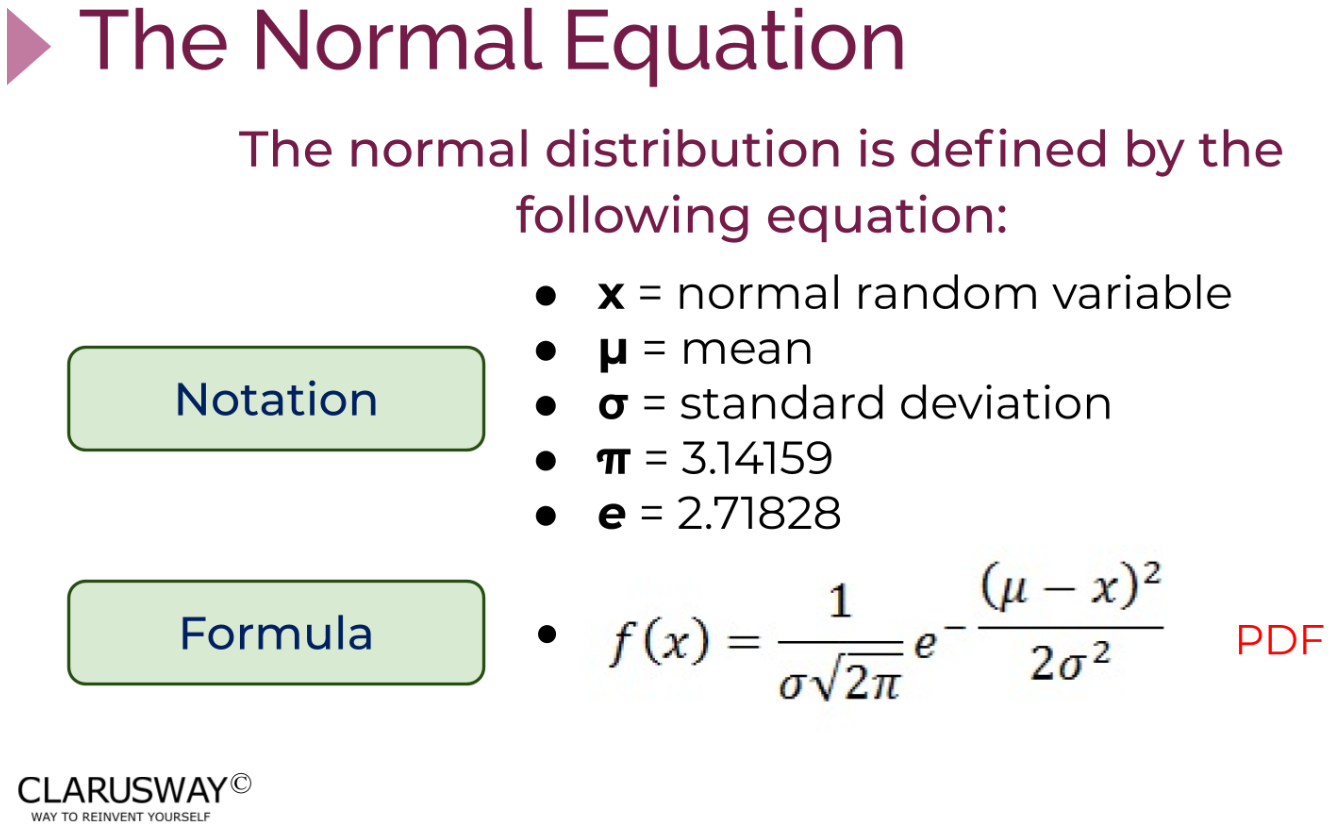

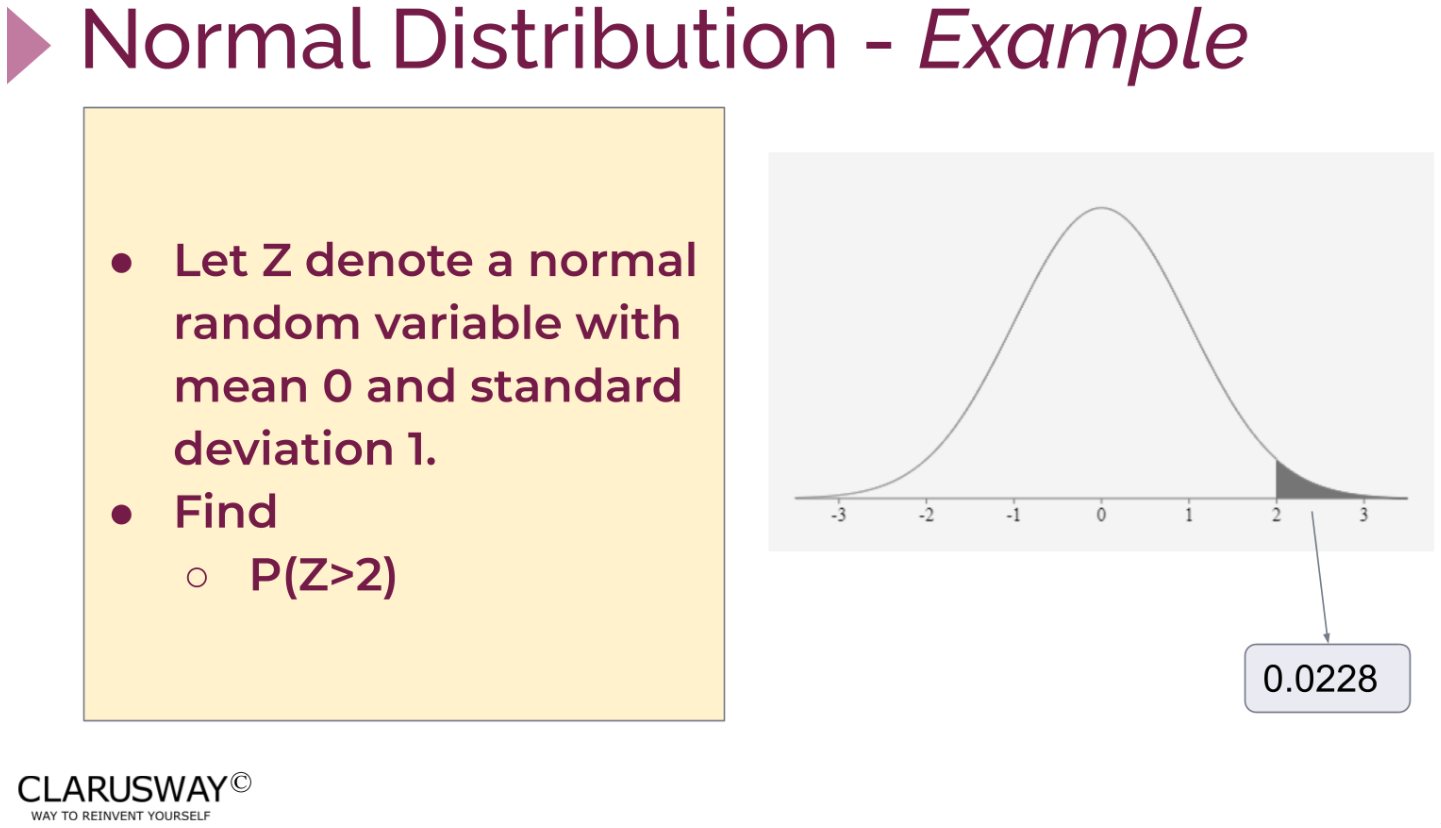

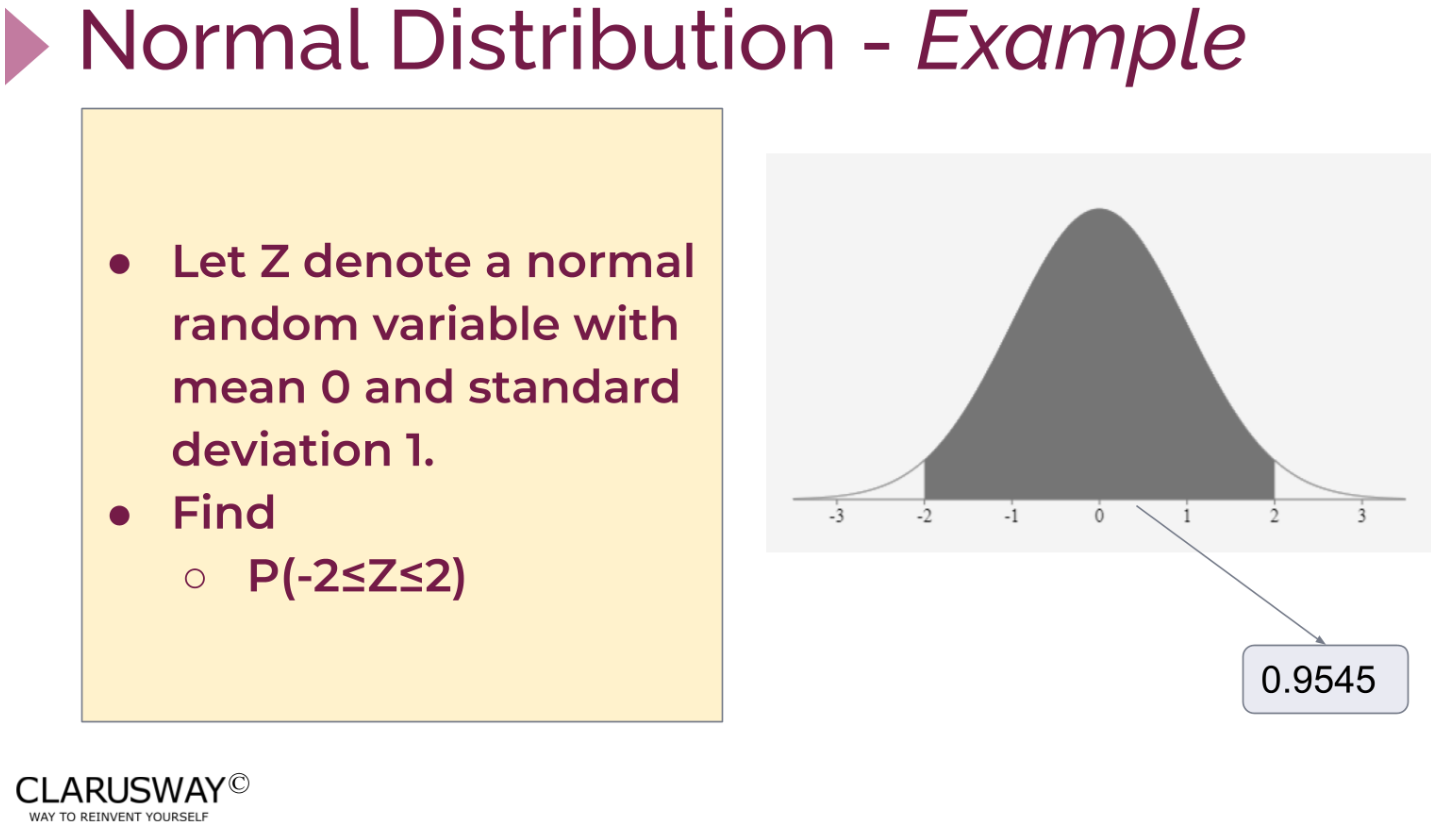

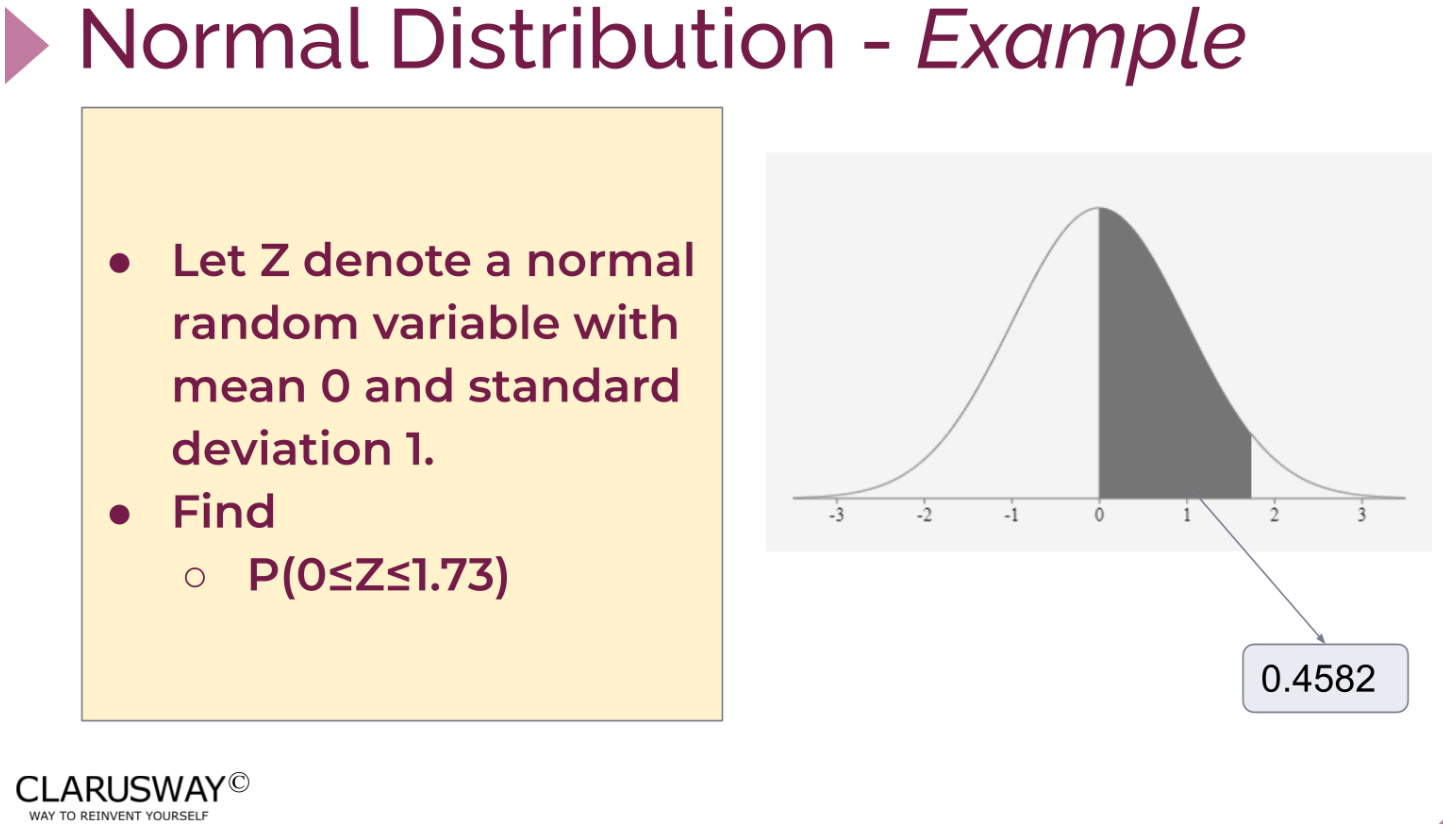

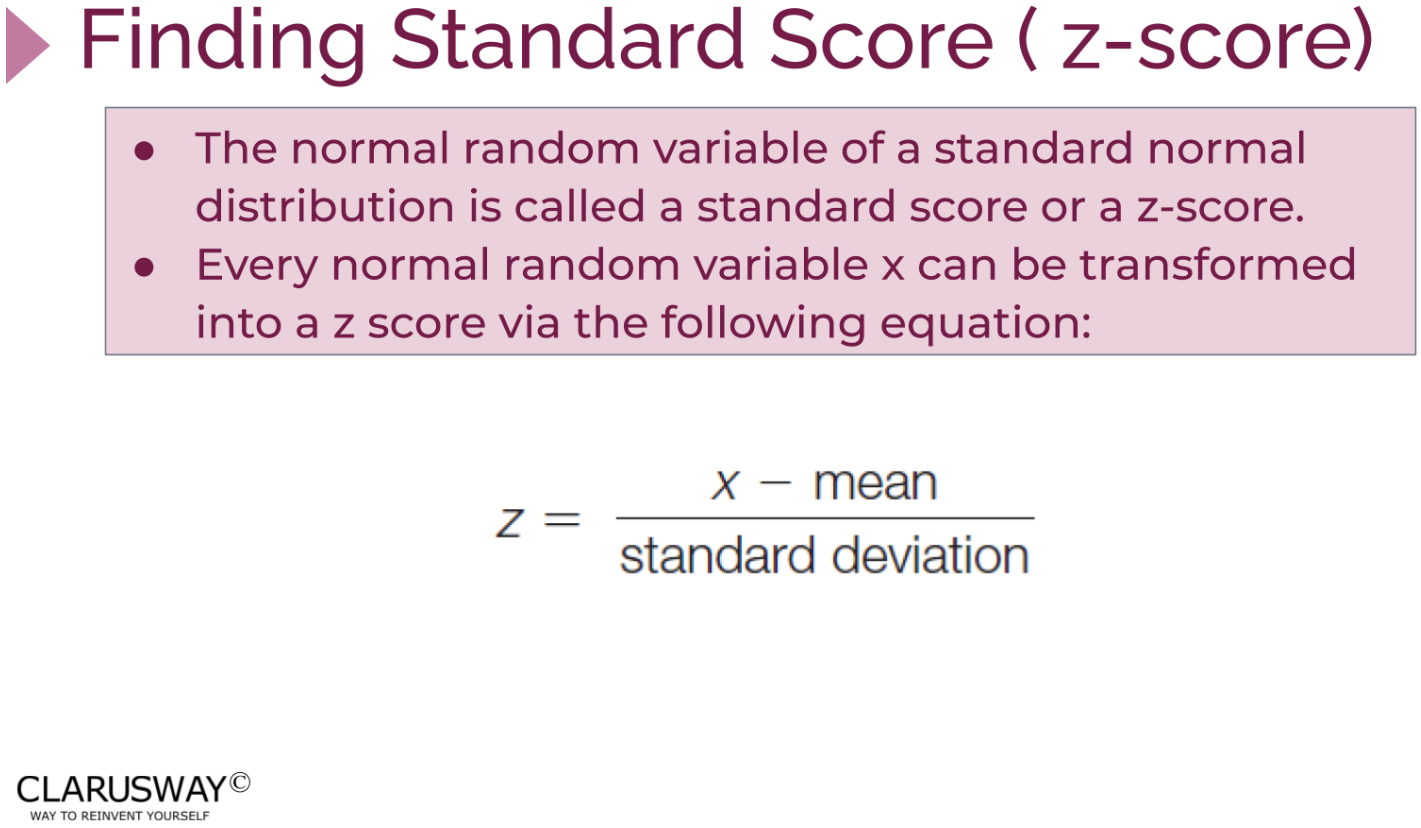

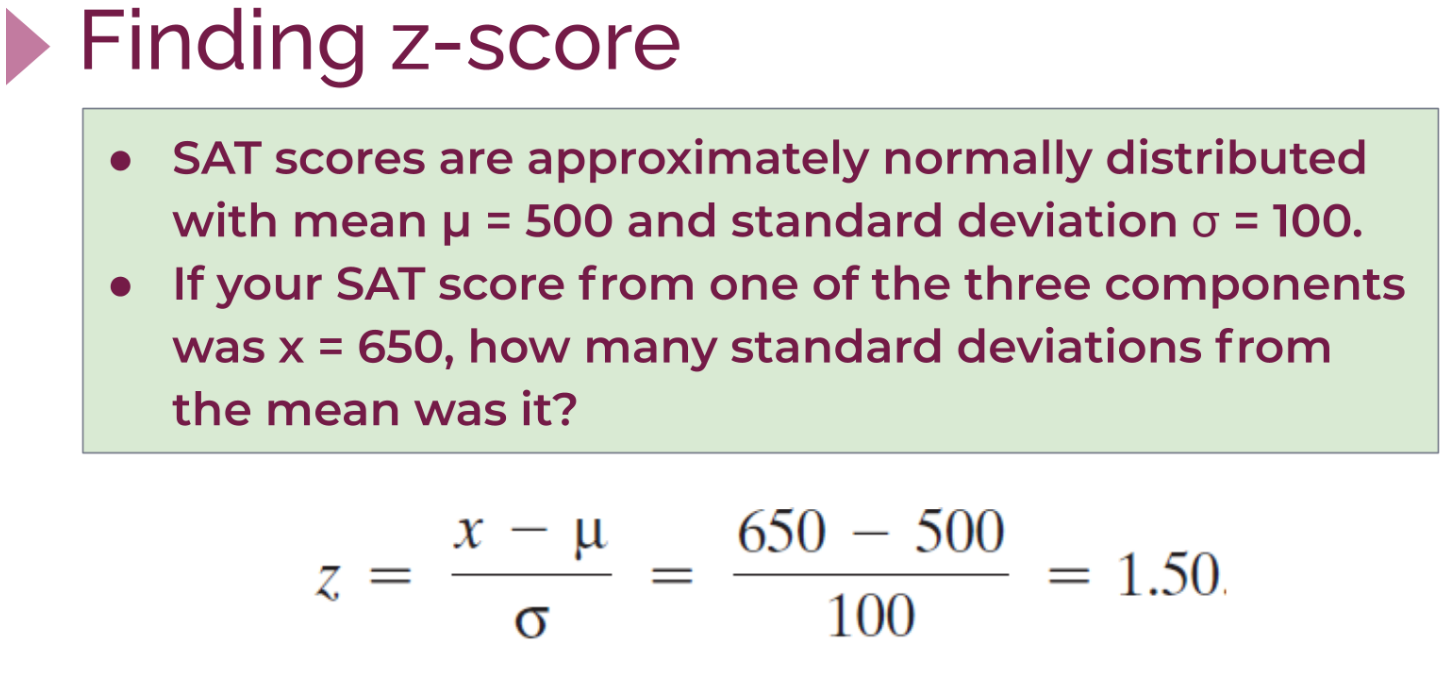

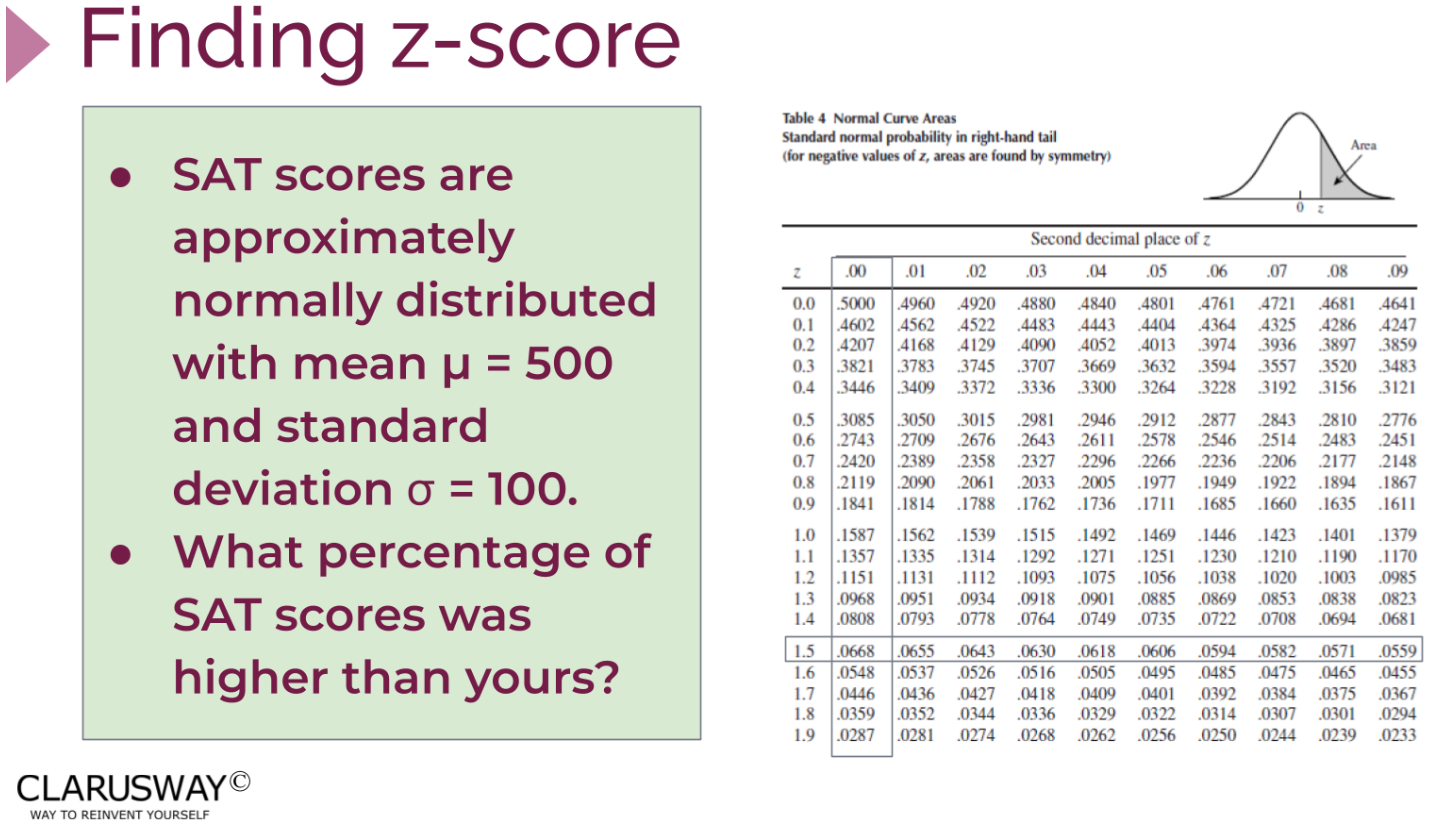

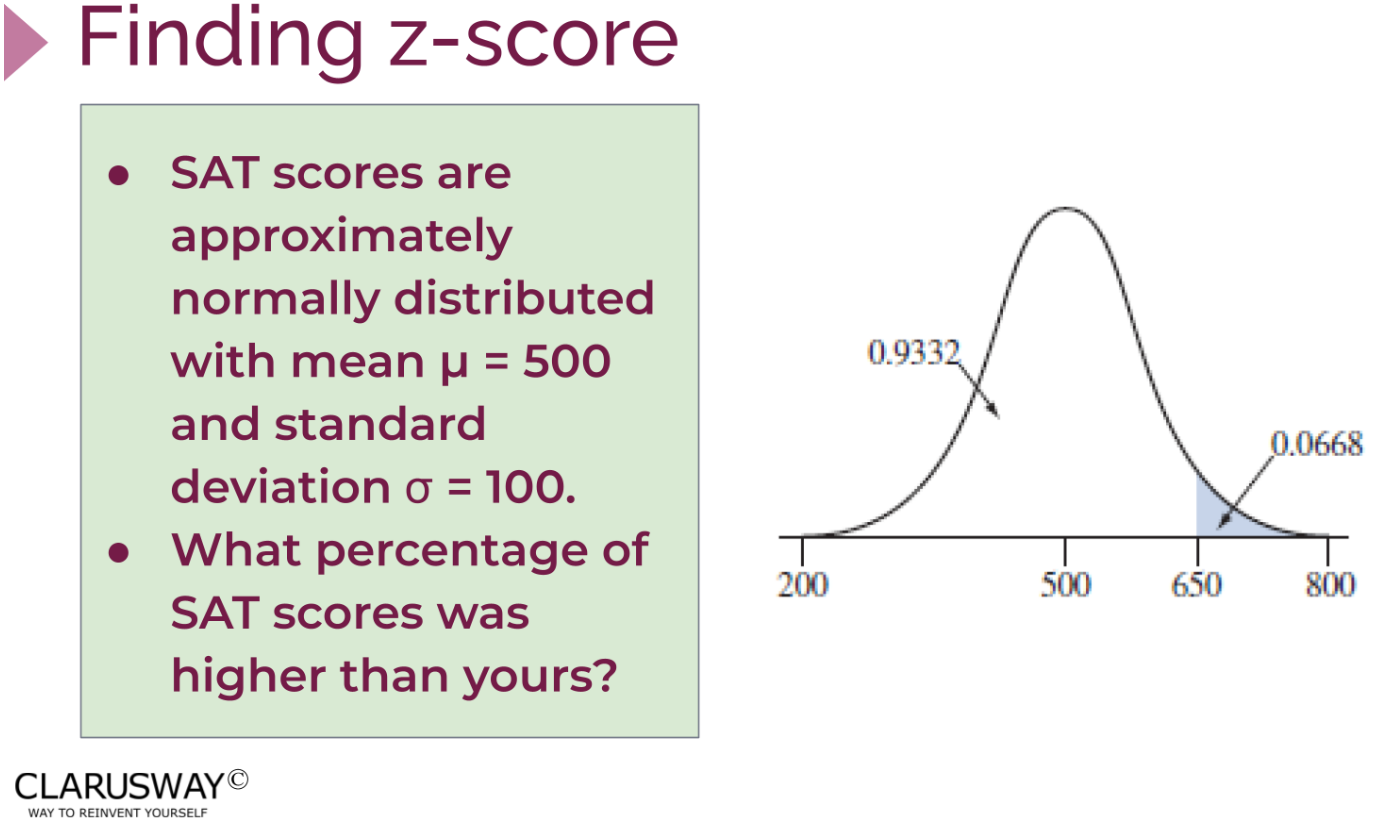

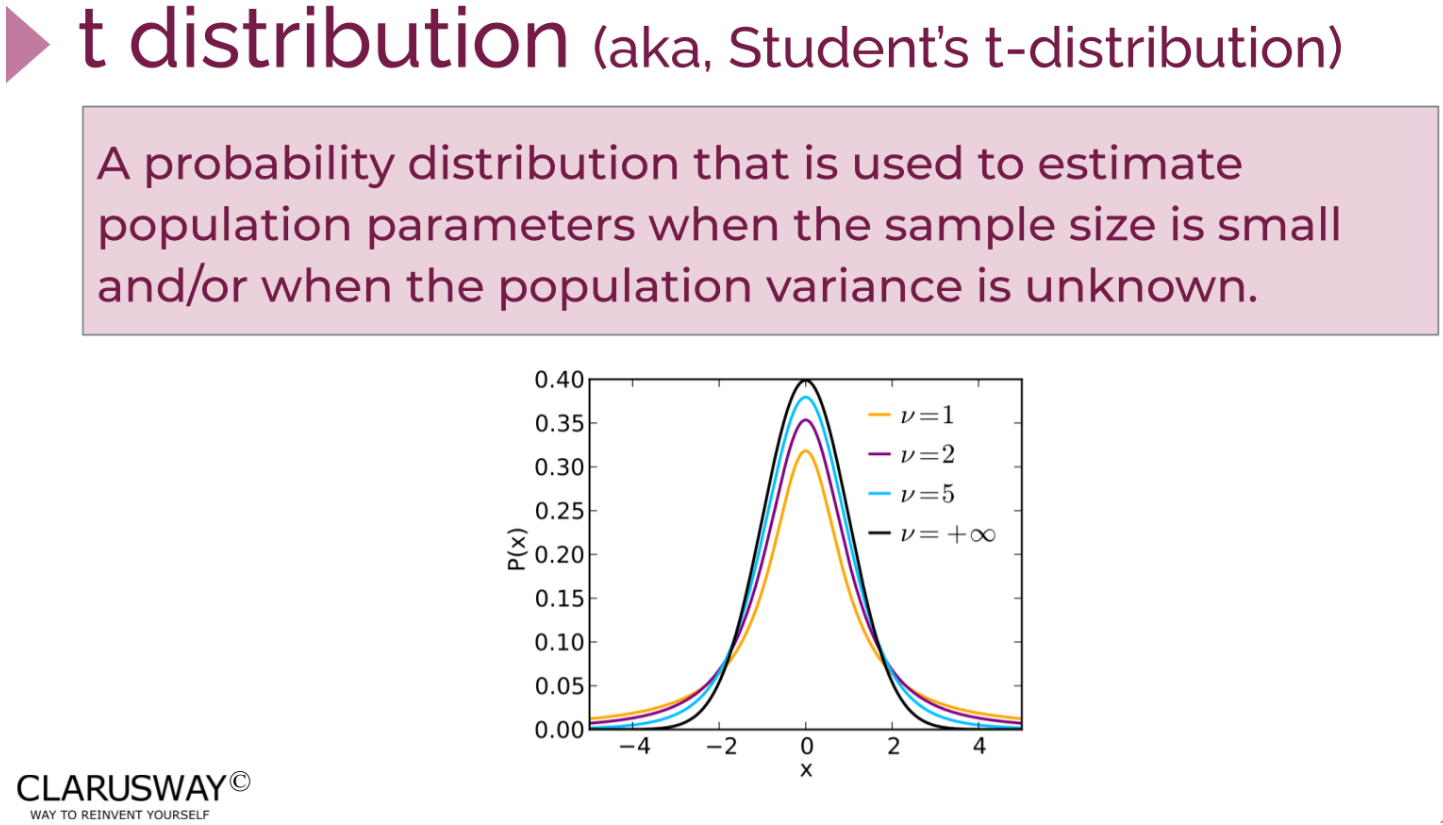

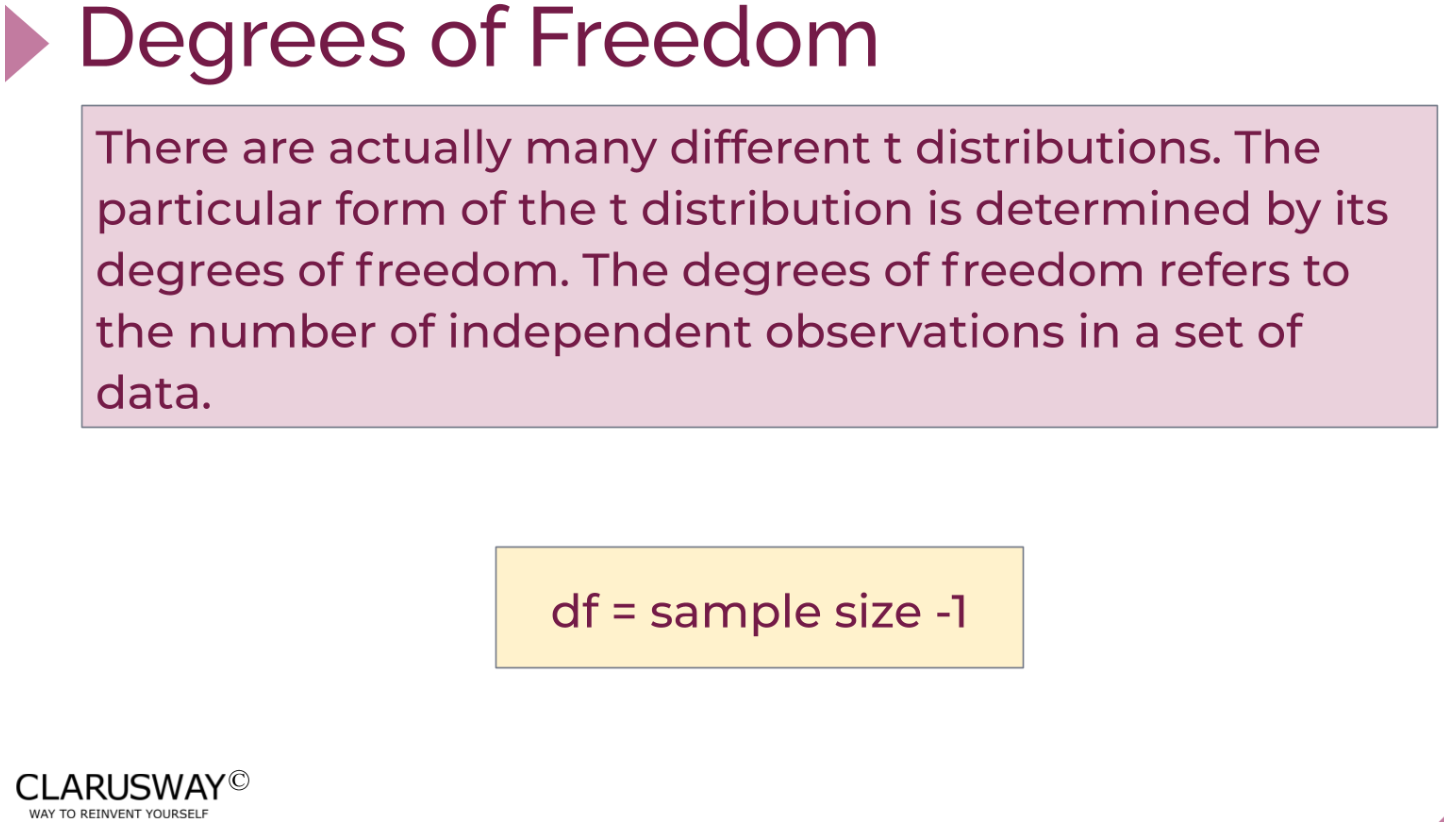

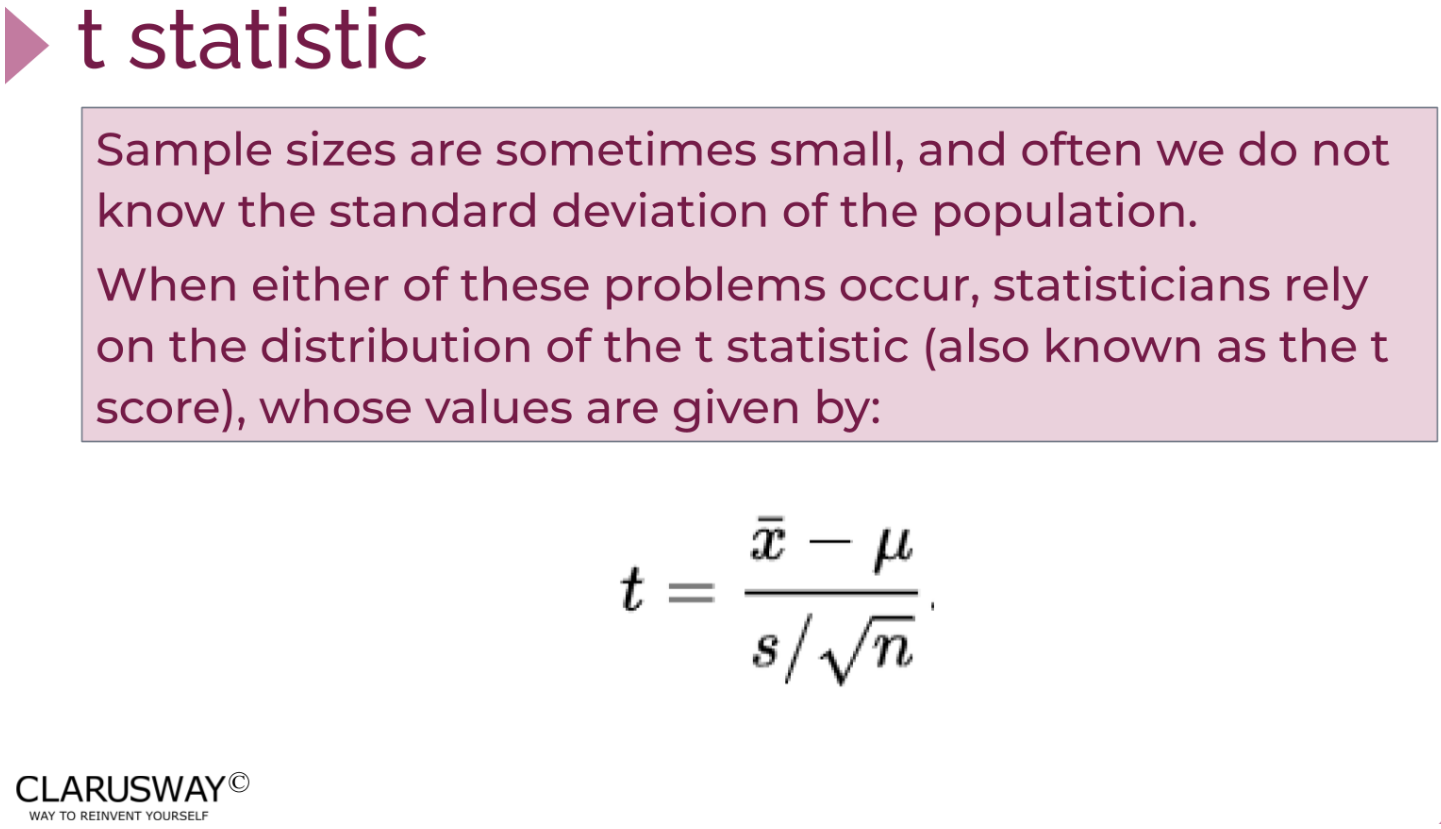

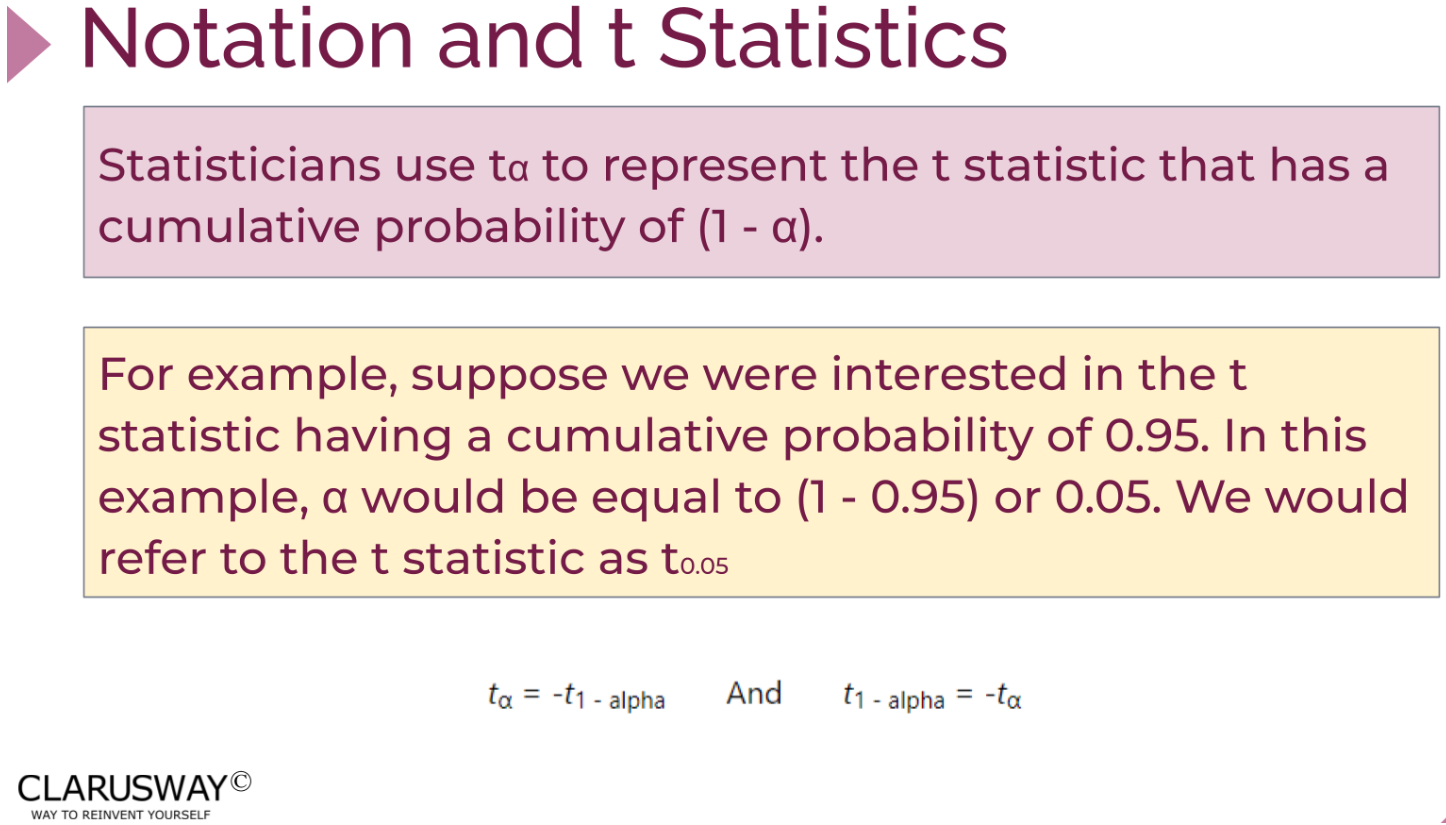

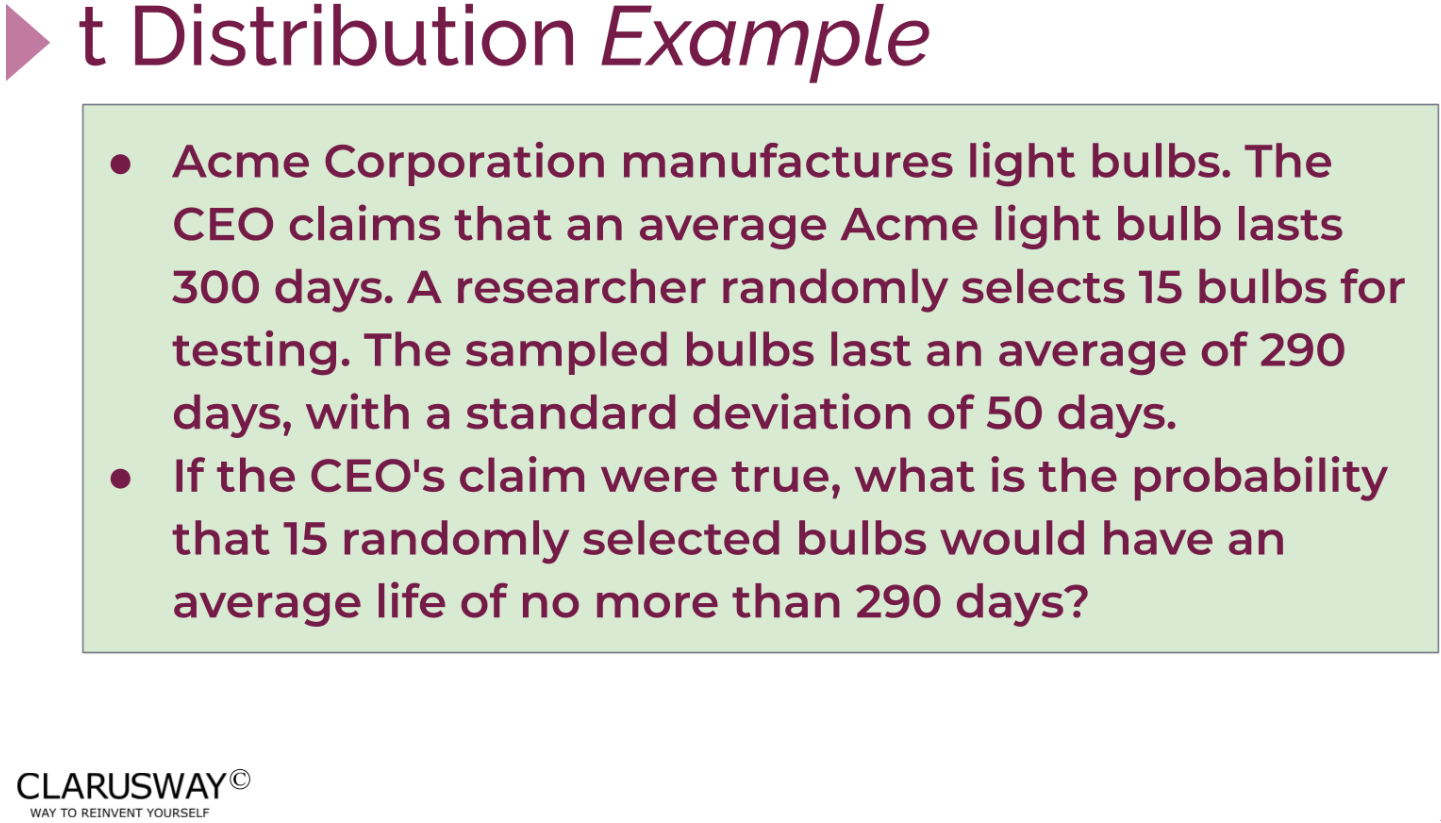

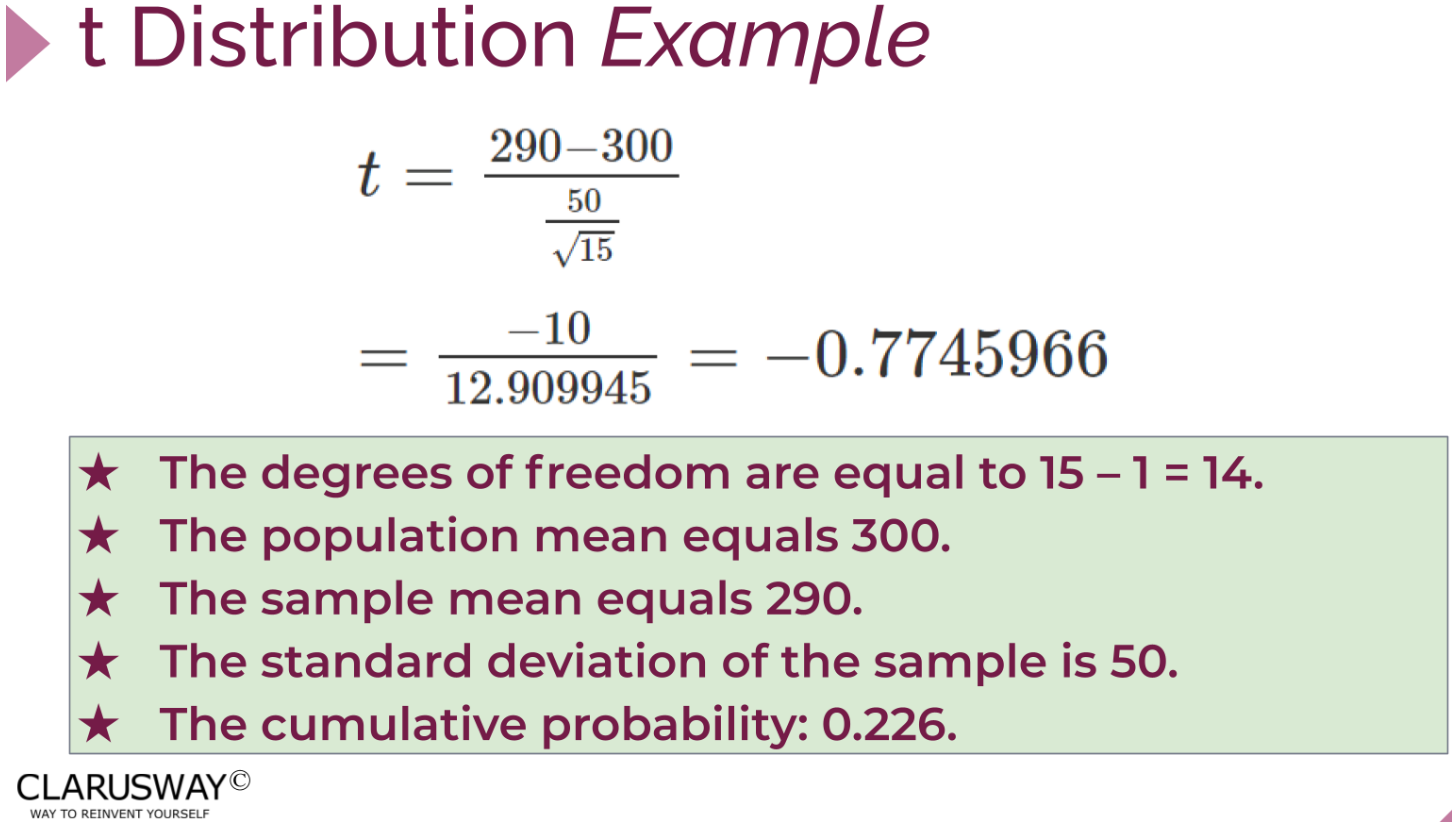

## EXERCISES

**Exercise 1**

The probability that a patient recovers from a stomach disease is 0.8. 

Suppose 20 people are known to have contracted this disease. 

What is the probability that

a. **exactly** 14 recover?

this is P(X=14)

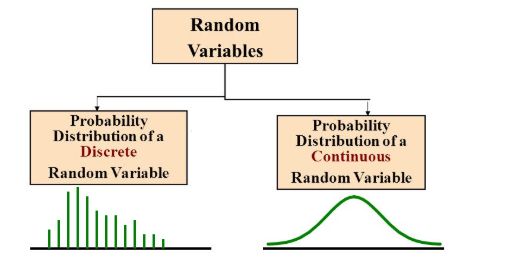

In [5]:
n = 20  # which is sample size
p = 0.8 # which is probability 
k = 14  # which is random variable

Like in this question if we have n and p we can assume discrete distribution and binominal experiment (distribution) (Probability of success and the number of trial).

In the given case, the expected value is 16.

For more information about Binominal Distribution & Discrete Distribution please refer to https://en.wikipedia.org/wiki/Binomial_distribution

For more information about Probability Mass Function (PMF) please refer to https://en.wikipedia.org/wiki/Probability_mass_function

In [6]:
stats.binom.pmf(k, n, p)

0.10909970097305016

For more information about scipy.stats.binom please refer to https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

b. **at least** 10 recover?

this is P(X≥10)=P(10)+P(11)+P(12)+...+P(20)

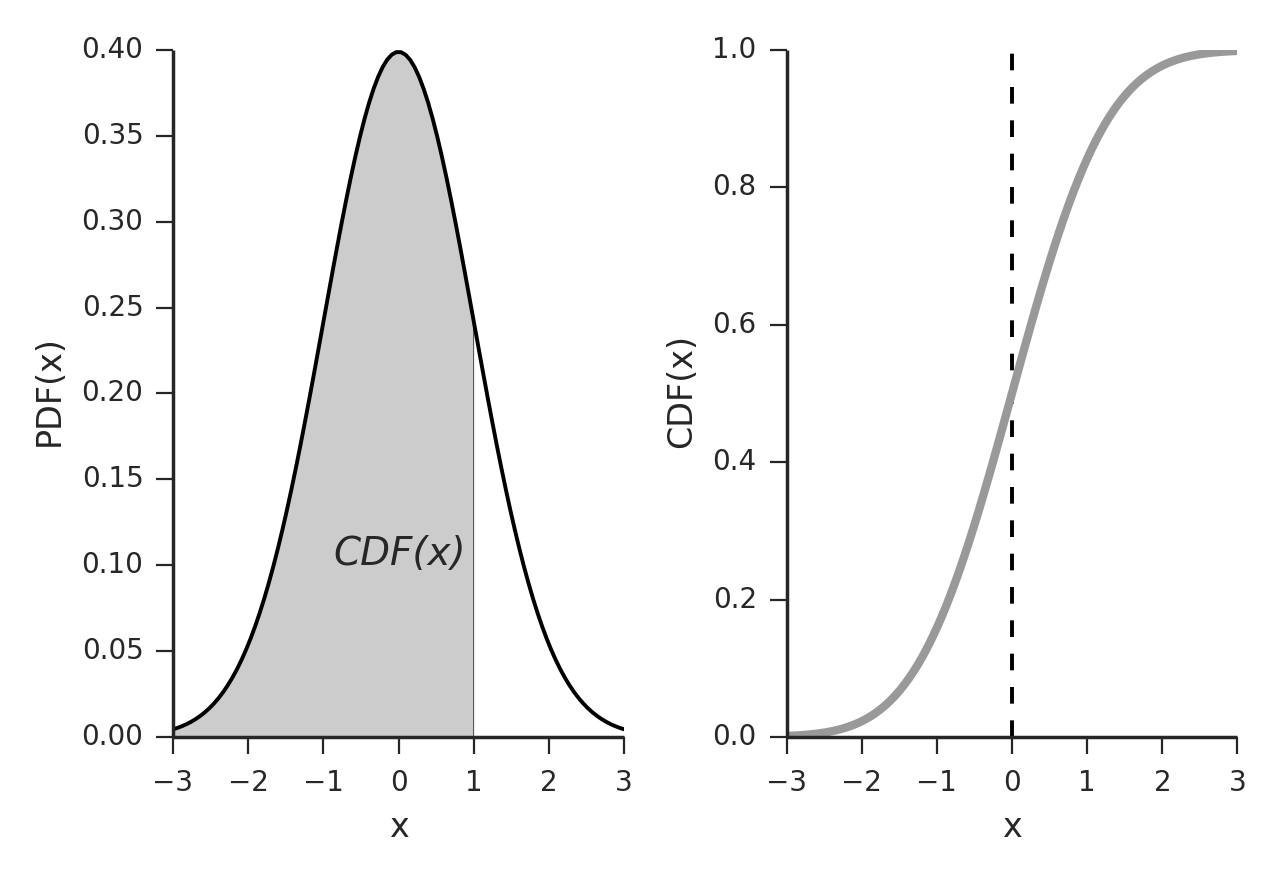

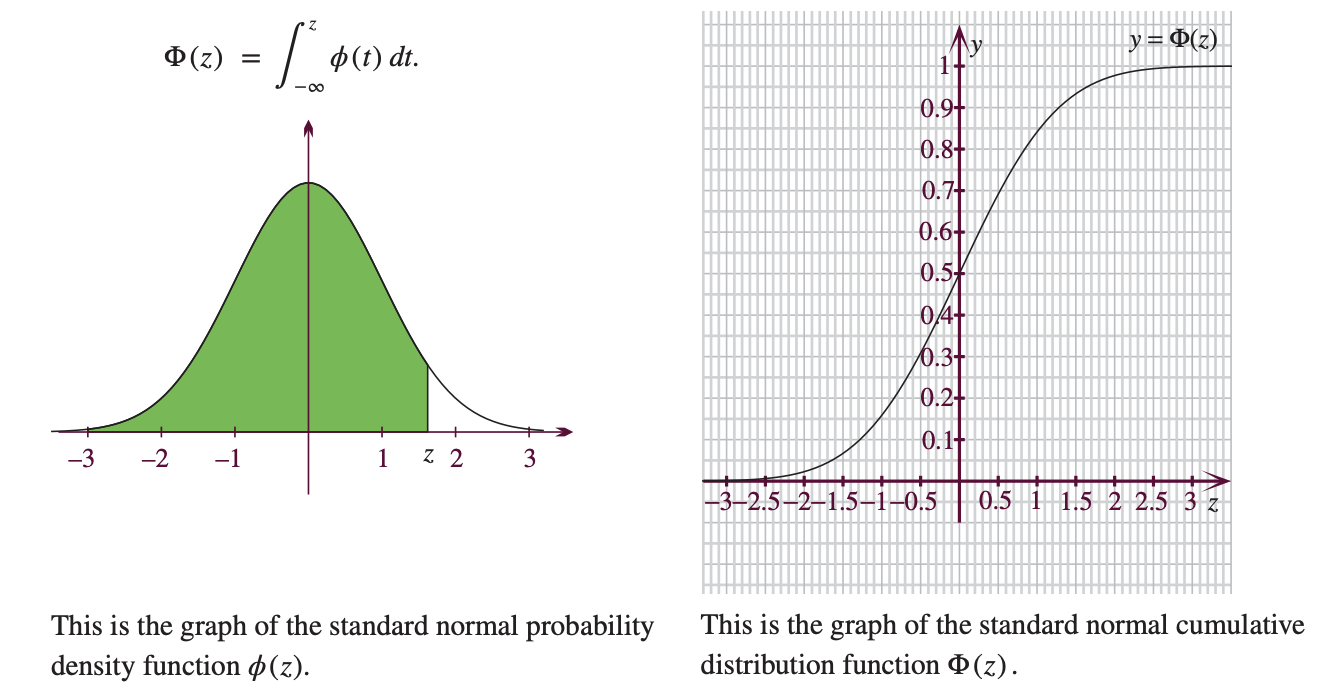

In [8]:
k = 9  # why not 10?

In [9]:
1 - stats.binom.cdf(k, n, p)

0.9994365863023398

For more information about Cumulative Density Function (CDF) please refer to https://en.wikipedia.org/wiki/Cumulative_distribution_function

In [7]:
stats.binom.pmf(k,n,p)  # Here we just calculated the probability of exactly 9 recovery

0.10909970097305016

For more information about Probability Mass Function (PMF) please refer to https://en.wikipedia.org/wiki/Probability_mass_function

c. **at least** 14 but **not more** than 18 recover?

this is P(14≤X≤18)=P(14)+P(15)+...+P(18)

In [10]:
x1 = 14
x2 = 18

In [11]:
# Method 1

stats.binom.pmf(14,n,p) + stats.binom.pmf(15,n,p) + stats.binom.pmf(16,n,p) + stats.binom.pmf(17,n,p) + stats.binom.pmf(18,n,p)

0.8441321961561888

In [12]:
# Method 2

stats.binom.cdf(18, n, p)

0.9308247097235891

In [17]:
stats.binom.cdf(x2, n, p) - stats.binom.cdf(x1-1, n, p)

0.844132196156189

d. **at most** 16 recover?

this is P(X≤16)=1−P(X>16)=P(17)+P(18)+P(19)+P(20)

In [18]:
k = 16

In [19]:
stats.binom.cdf(k, n, p)

0.5885511380434314

e. Construct **discrete probability distribution table** and draw a **graph**

In [26]:
dist = []

for i in range(n+1):
    dist.append(stats.binom.pmf(i, n, p))
    print(str(i) + "\t" + str(stats.binom.pmf(i, n, p)))

0	1.0485759999999954e-14
1	8.388607999999964e-13
2	3.187671039999986e-11
3	7.650410495999971e-10
4	1.3005697843199968e-08
5	1.664729323929596e-07
6	1.664729323929598e-06
7	1.3317834591436782e-05
8	8.656592484433914e-05
9	0.0004616849325031411
10	0.0020314137030138213
11	0.007386958920050267
12	0.02216087676015084
13	0.05454985048652511
14	0.10909970097305016
15	0.17455952155688043
16	0.2181994019461004
17	0.20536414300809458
18	0.13690942867206324
19	0.05764607523034235
20	0.011529215046068483


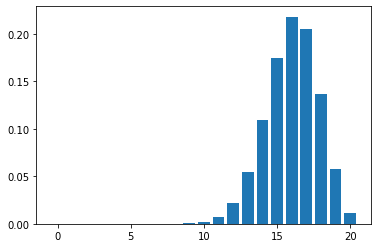

In [29]:
plt.bar(list(range(n+1)), dist);

In [40]:
px.bar(list(range(n+1)), y=dist, labels={
                     "index": "The Number of Patient Exactly Recovering from a Stomach Disease",
                     "y": "Probability of Mass Function (PMF)"
                     })

## Question 2
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.* Exercise 4.74

**Exercise 2**

Scores on an examination are assumed to be normally distributed with mean 78 and variance 36.

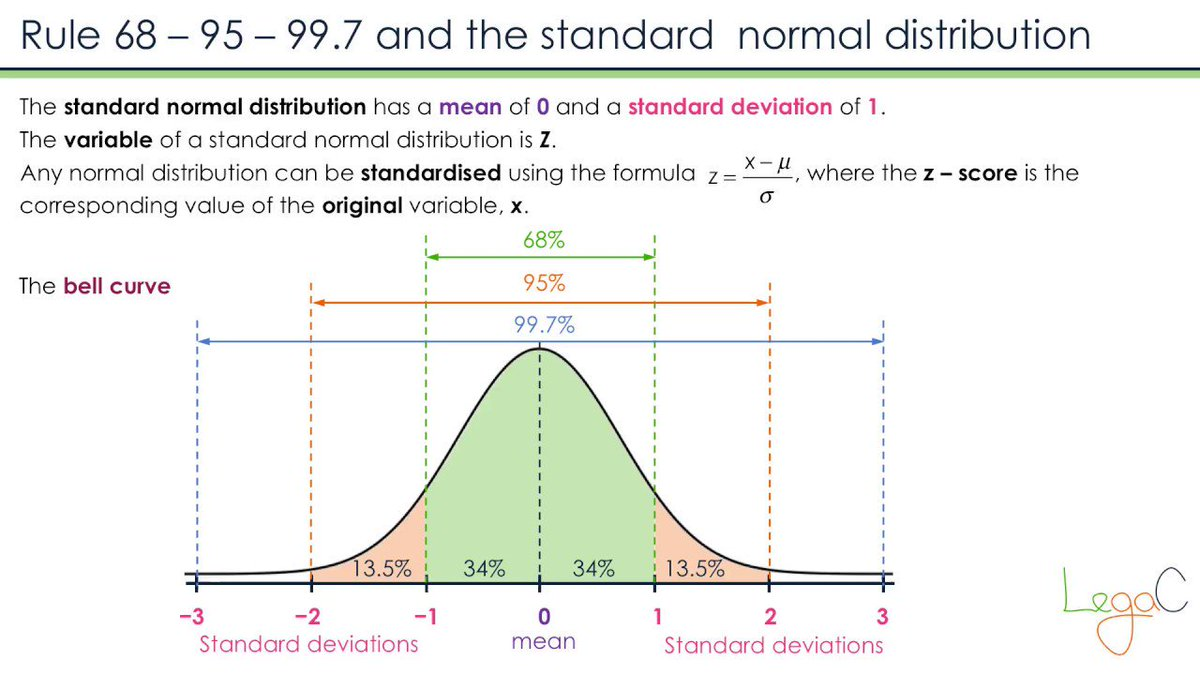

a. What is the probability that a person taking the examination **scores higher than 72?**

this is P(X>72)  ==> In fact this means that in continuous distribution P(X>72) = P(X>=72) since P(X=72) = 0

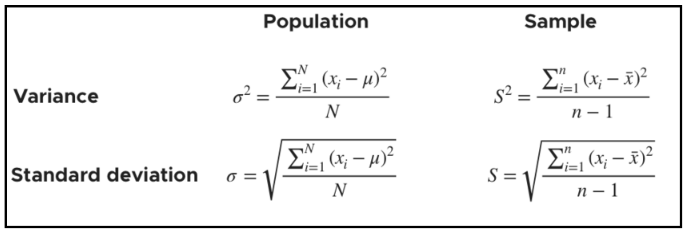

In [44]:
variance = 36
mu = 78
sigma = np.sqrt(variance)
x = 72

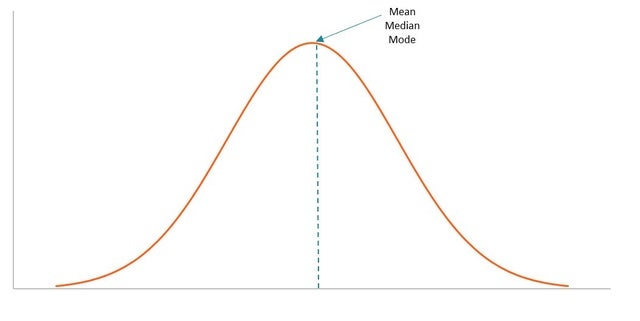

In [46]:
stats.norm.cdf(x, mu, sigma)

0.15865525393145707

In [45]:
1 - stats.norm.cdf(x, mu, sigma)

0.8413447460685429

b. Suppose that students scoring in the **top 10%** of this distribution are to receive an A grade.
What is the **minimum score** a student must achieve to earn an A grade?

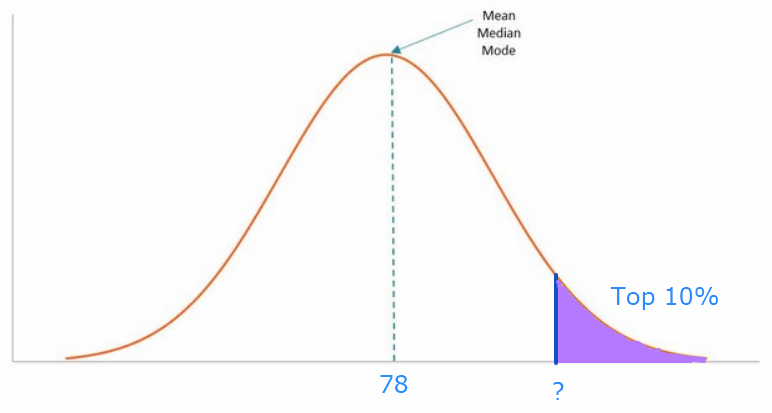

In [47]:
q = 1 - 0.1

Percent Point Function (Inverse of CDF-percentiles)

ppf(q, loc=0, scale=1)

loc = mu 

scale = std

In [18]:
stats.norm.ppf(q, mu, sigma)

85.6893093932676

In [48]:
stats.norm.cdf(85.6893093932676, mu,sigma)

0.9000000000000001

CDF ==> X ==> P

PPF ==> P ==> X

c. What must be the **cutoff point** for passing the examination if the examiner wants only the
**top 28.1%** of all scores to be passing?

In [49]:
q = 1 - 0.281
q

0.719

In [50]:
stats.norm.ppf(q,mu,sigma)

81.47924035456623

d. Approximately what proportion of students have **scores 5 or more points** above the score
that **cuts off the lowest 25%?**

In [52]:
q1 = 0.25
x1 = stats.norm.ppf(q1, mu, sigma)
x1

73.95306149882352

In [53]:
1 - stats.norm.cdf(x1+5, mu, sigma)

0.43689605516226615

*OPTIONAL*

f. If it is known that a student’s score exceeds 72, what is the probability that his or her score
exceeds 84? 

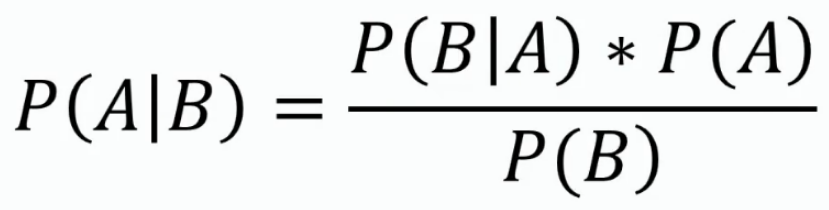

In [64]:
stats.norm.cdf(72, mu, sigma)

0.15865525393145707

In [65]:
stats.norm.cdf(84, mu, sigma)

0.8413447460685429

In [63]:
stats.norm.cdf(72, mu, sigma) / stats.norm.cdf(84, mu, sigma)

0.18857341734506025

## t-distribution

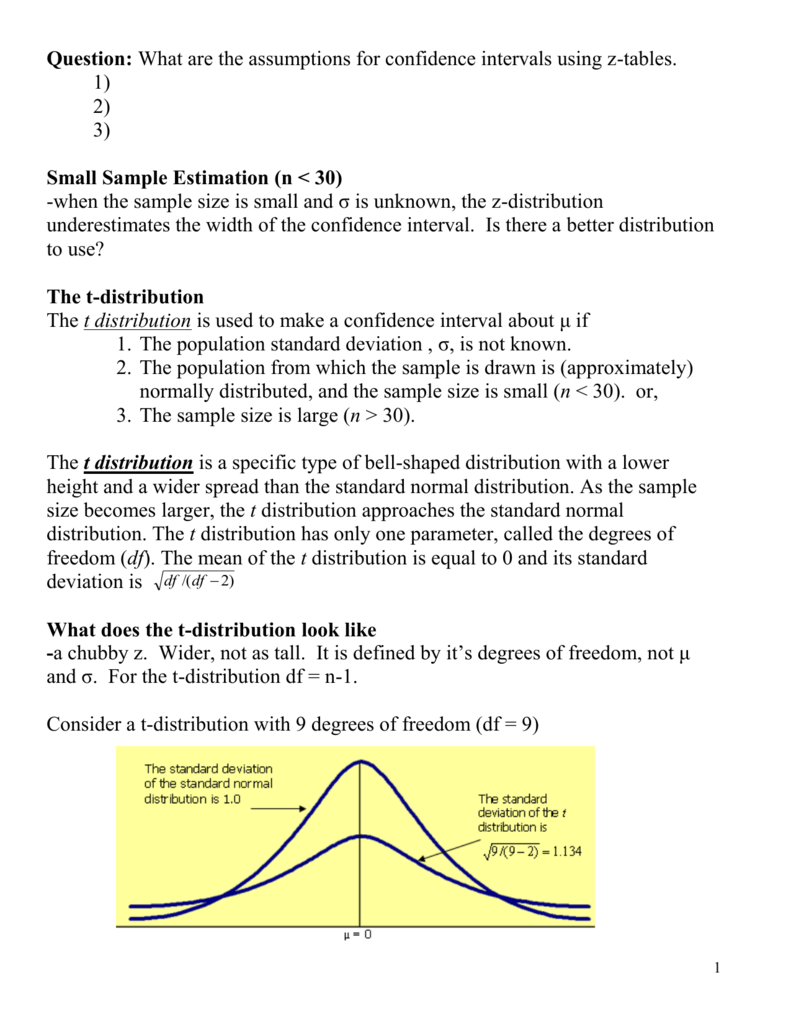

## Question 3
*Lane, D. (2006). Online statistics education: a multimedia course of study (http://onlinestatbook.com/). Rice University.*

For a **t distribution with 15 degrees of freedom, 90% of the distribution** is within how many standard deviations of the mean?

In [67]:
df = 15
q = 0.95

In [68]:
stats.t.ppf(q, df)

1.7530503556925547

For more information about t-distribution please refer to https://en.wikipedia.org/wiki/Student%27s_t-distribution

For more information about t-distribution please refer to https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

**How do t-distribution and normal distribution look like?**

In [72]:
np.linspace(-5, 5, 1000)

array([-5.        , -4.98998999, -4.97997998, -4.96996997, -4.95995996,
       -4.94994995, -4.93993994, -4.92992993, -4.91991992, -4.90990991,
       -4.8998999 , -4.88988989, -4.87987988, -4.86986987, -4.85985986,
       -4.84984985, -4.83983984, -4.82982983, -4.81981982, -4.80980981,
       -4.7997998 , -4.78978979, -4.77977978, -4.76976977, -4.75975976,
       -4.74974975, -4.73973974, -4.72972973, -4.71971972, -4.70970971,
       -4.6996997 , -4.68968969, -4.67967968, -4.66966967, -4.65965966,
       -4.64964965, -4.63963964, -4.62962963, -4.61961962, -4.60960961,
       -4.5995996 , -4.58958959, -4.57957958, -4.56956957, -4.55955956,
       -4.54954955, -4.53953954, -4.52952953, -4.51951952, -4.50950951,
       -4.4994995 , -4.48948949, -4.47947948, -4.46946947, -4.45945946,
       -4.44944945, -4.43943944, -4.42942943, -4.41941942, -4.40940941,
       -4.3993994 , -4.38938939, -4.37937938, -4.36936937, -4.35935936,
       -4.34934935, -4.33933934, -4.32932933, -4.31931932, -4.30

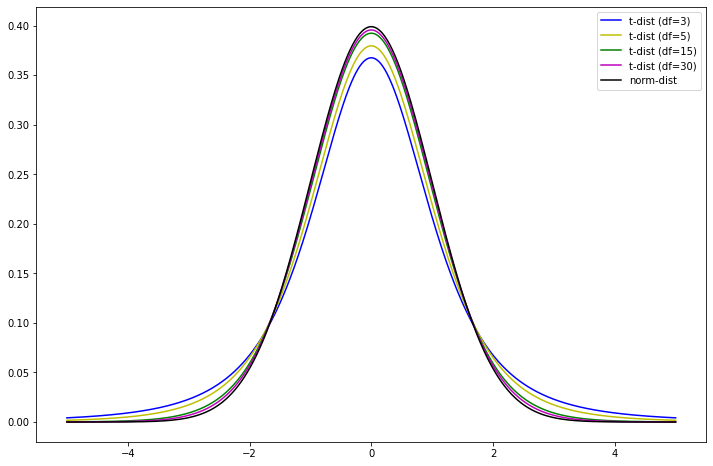

In [71]:
plt.figure(figsize=(12,8))
xs = np.linspace(-5,5,1000)
plt.plot(xs, stats.t.pdf(xs, 3), "b", label = "t-dist (df=3)")
plt.plot(xs, stats.t.pdf(xs, 5), "y", label = "t-dist (df=5)")
plt.plot(xs, stats.t.pdf(xs, 15), "g", label = "t-dist (df=15)")
plt.plot(xs, stats.t.pdf(xs, 30), "m", label = "t-dist (df=30)")
plt.plot(xs, stats.norm.pdf(xs), "k", label = "norm-dist")
plt.legend();

## Confidence Intervals Using the Normal Distribution

If we’re working with larger samples (n≥30), we can assume that the sampling distribution of the sample mean is normally distributed (thanks to the Central Limit Theorem) and can instead use the norm.interval() function from the scipy.stats library.

**CI Formula for the Mean with σ known**

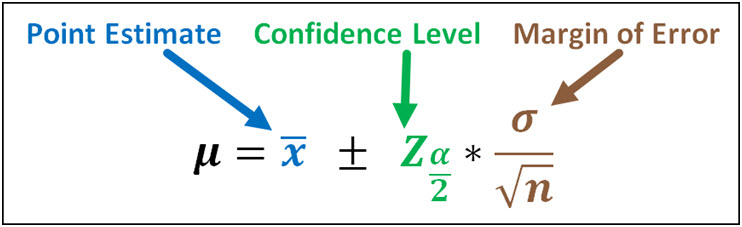

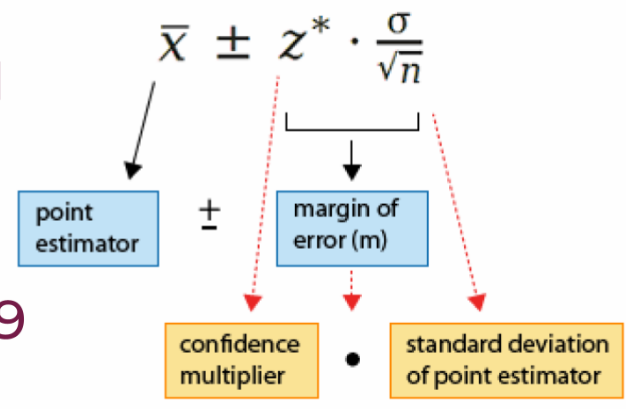

In [78]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

1. Load "tips" dataset from Seaborn library

In [79]:
tips = sns.load_dataset("tips")
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

2. Draw a set of vertical bar plots (based on "total_bill") grouped by "day" variable:

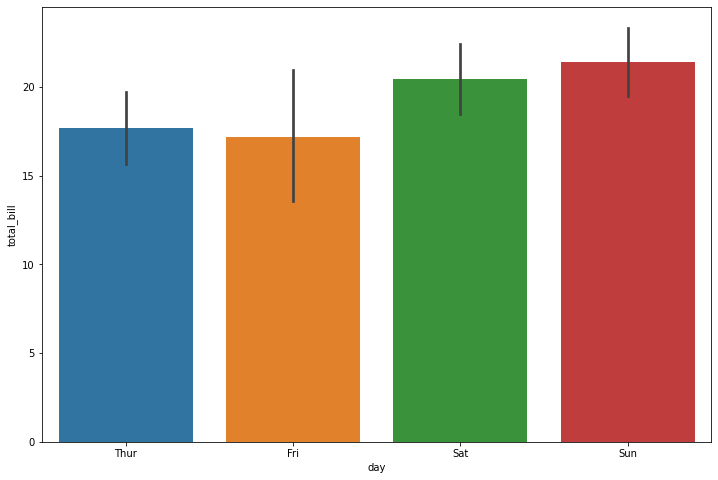

In [82]:
plt.figure(figsize=(12, 8))
sns.barplot(data=tips, x="day", y="total_bill", ci=95);

3. Subset a dataframe just including Sunday tips

In [83]:
tipsSun = tips[tips["day"] == "Sun"]
tipsSun.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

4. Calculate the mean and std of "total_bill"

In [84]:
tipsSun["total_bill"].mean()

21.41

In [85]:
sigma = tipsSun["total_bill"].std()

5. Calculate standart error of the mean

In [86]:
n = len(tipsSun)
n

76

In [87]:
tipsSun.shape[0]

76

In [90]:
sem = sigma / np.sqrt(n)

In [92]:
sem

1.0131138555021968

6. Calculate the margin of error (95%)

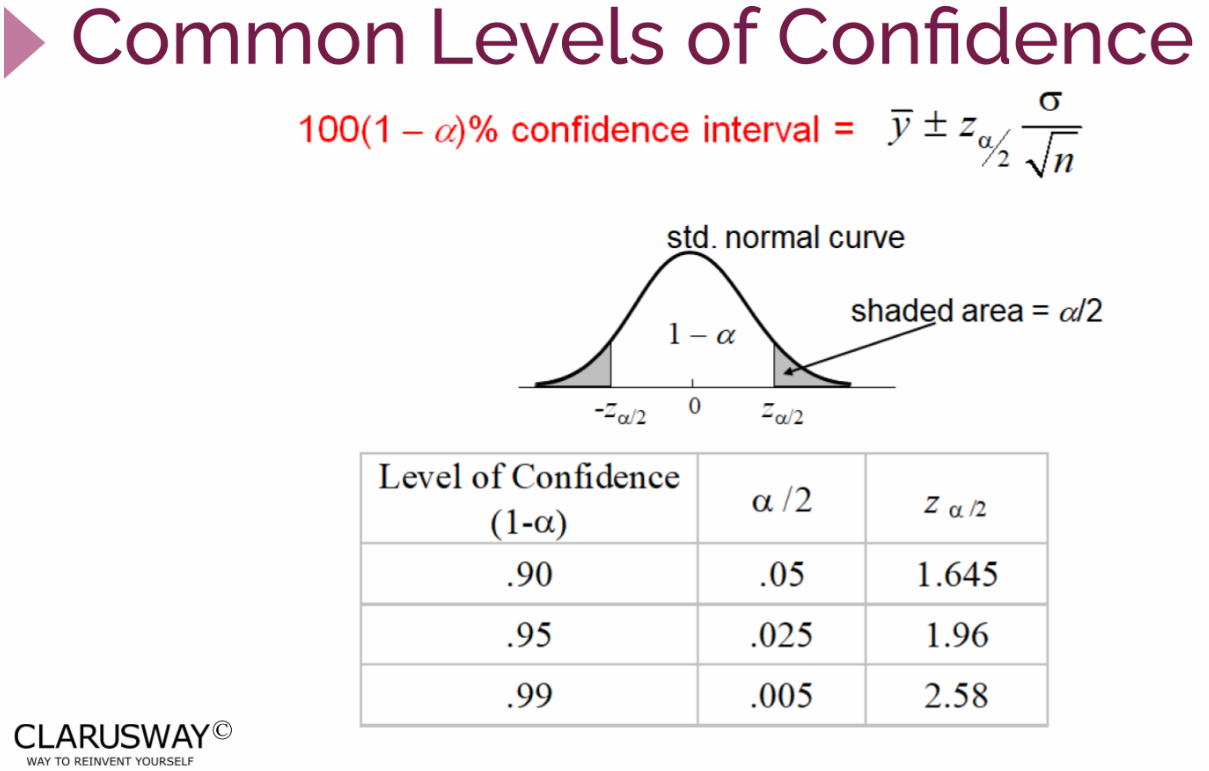

In [89]:
stats.norm.ppf(0.975)

1.959963984540054

In [41]:
stats.norm.ppf(0.025)

-1.9599639845400545

In [94]:
moe = stats.norm.ppf(0.975) * sem

In [95]:
moe

1.9856666690228222

7. Calculate the upper confidence limit

In [96]:
tipsSun["total_bill"].mean() + moe

23.395666669022823

8. Calculate the lower confidence limit

In [ ]:
tipsSun["total_bill"].mean() - moe

9. Calculate 95% Confidence Interval around the mean by using scipy.stats

In [46]:
stats.norm.interval(alpha=0.95, loc=tipsSun["total_bill"].mean(), scale=sem)

(19.42433333097718, 23.395666669022827)

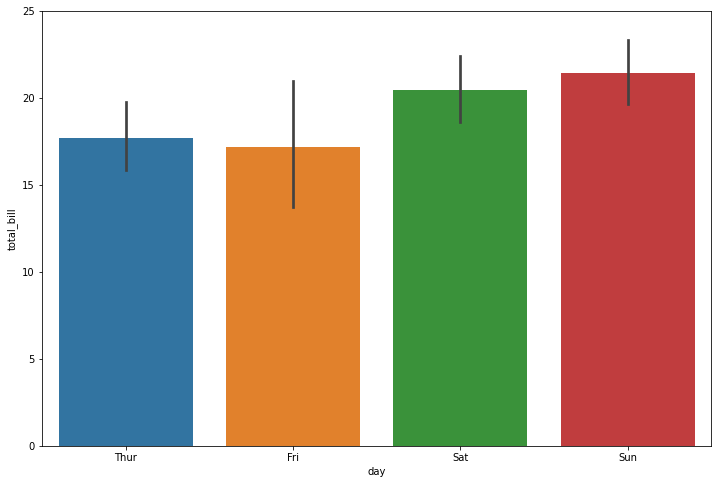

In [100]:
plt.figure(figsize=(12, 8))
sns.barplot(data=tips, x="day", y="total_bill", ci=95)
plt.ylim(0, 25, 1);